# Step by step guide to convert artificial neural network (ANN) to spiking neural network (SNN)

In [38]:
# Use python 3, Tensorflow and Keras for this tutorials.
# Import packages
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

Using TensorFlow backend.
/home/roshan/py3/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/roshan/py3/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/roshan/py3/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/roshan/py3/lib/python3.5/site-packages/tensorflow/python/framework/d

# Spiking neuron for SNN: Leaky and non-leaky Integrate and Fire (LIF & IF) neuron model

Neuron spikes 2 times at the following simulation time steps:[47, 94]


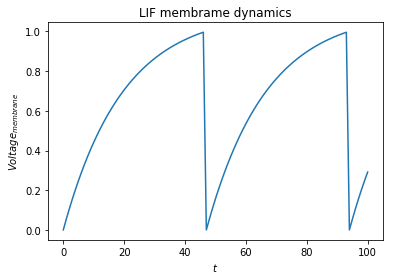

In [30]:
# A spiking neuron integrates the input current and fires a spike output when it reaches a threshold.
# A simple LIF neuron with reset to zero (r20), simulation for constant current source

T = 100                        # ms
tau = 20                       # ms
threshold = 1                  # Threshold voltage
reset = 0                      # Reset voltage
v = [0]                        # Initial membrane potential
i = 1.1                         # assuming constant synaptic input
st = []                        # Spike train
for t in range(T):
    # Check threshold
    if v[t] >= threshold:
        v[t] = reset 
        st.append(t)
    # Membrane dynamics
    dv = (1/tau)*(-v[t] + i)         # with leak
    # Save data
    v.append(v[t] + dv)
    #print(vmem)

print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

# plot of LIF neuron model

%matplotlib inline
# Plot membrane potential
plt.figure()
plt.plot(range(T+1), v)
plt.title('LIF membrame dynamics')
plt.xlabel('$t$')
_=plt.ylabel('$Voltage_{membrane}$')

Neuron spikes 6 times at the following simulation time steps:[15, 30, 45, 60, 75, 90]


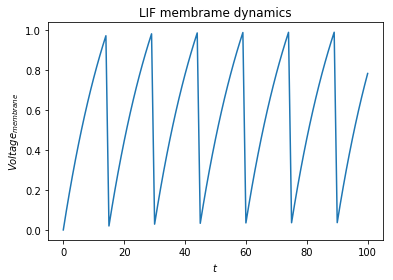

In [36]:
# A simple LIF neuron with reset by subtraction (rbs), simulation for constant current source
# In fact no difference compared to reset  to zero

T = 100                        # ms
tau = 20                       # ms
threshold = 1                  # Threshold voltage
reset = 0                      # Reset voltage
v = [0]                        # Initial membrane potential
i = 1.1                         # assuming constant synaptic input
st = []                        # Spike train
for t in range(T):
    # Check threshold
    if v[t] >= threshold:
        v[t] -= threshold 
        st.append(t)
    # Membrane dynamics
    dv = (1/tau)*(-v[t] + i)         # with leak
    # Save data
    v.append(v[t] + dv)
    #print(vmem)

print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

# plot of LIF neuron model

%matplotlib inline
# Plot membrane potential
plt.figure()
plt.plot(range(T+1), v)
plt.title('LIF membrame dynamics')
plt.xlabel('$t$')
_=plt.ylabel('$Voltage_{membrane}$')

Neuron spikes 49 times at the following simulation time steps:[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98]


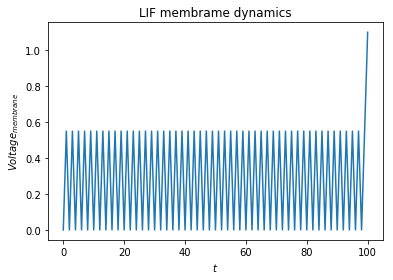

In [31]:
# A simple non-leaky integrate and fire (IF) neuron with reset to zero (r20), simulation for constant current source

T = 100                        # ms
tau = 20                       # ms
threshold = 1                  # Threshold voltage
reset = 0                      # Reset voltage
v = [0]                        # Initial membrane potential
i = 1.1                         # assuming constant synaptic input
st = []                        # Spike train
for t in range(T):
    # Check threshold
    if v[t] >= threshold:
        v[t] = reset  
        st.append(t)
    # Membrane dynamics
    dv = (1/tau)*(i_syn)               # without leak
    # Save data
    v.append(v[t] + dv)
    #print(vmem)

print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

# plot of LIF neuron model

%matplotlib inline
# Plot membrane potential
plt.figure()
plt.plot(range(T+1), v)
plt.title('LIF membrame dynamics')
plt.xlabel('$t$')
_=plt.ylabel('$Voltage_{membrane}$')

Neuron spikes 54 times at the following simulation time steps:[2, 4, 6, 8, 10, 11, 13, 15, 17, 19, 20, 22, 24, 26, 28, 30, 31, 33, 35, 37, 39, 40, 42, 44, 46, 48, 50, 51, 53, 55, 57, 59, 60, 62, 64, 66, 68, 70, 71, 73, 75, 77, 79, 80, 82, 84, 86, 88, 90, 91, 93, 95, 97, 99]


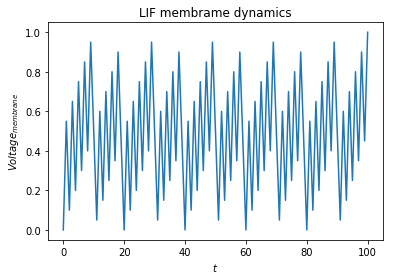

In [32]:
# A simple non-leaky integrate and fire (IF) neuron with reset by subtraction (rbs), simulation for constant current source

T = 100                        # ms
tau = 20                       # ms
threshold = 1                  # Threshold voltage
reset = 0                      # Reset voltage
v = [0]                        # Initial membrane potential
i = 1.1                         # assuming constant synaptic input
st = []                        # Spike train
for t in range(T):
    # Check threshold
    if v[t] >= threshold:
        v[t] -= threshold  
        st.append(t)
    # Membrane dynamics
    dv = (1/tau)*(i_syn)               # without leak
    # Save data
    v.append(v[t] + dv)
    #print(vmem)

print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

# plot of LIF neuron model

%matplotlib inline
# Plot membrane potential
plt.figure()
plt.plot(range(T+1), v)
plt.title('LIF membrame dynamics')
plt.xlabel('$t$')
_=plt.ylabel('$Voltage_{membrane}$')

# Step 1: Conversion of ReLU to IF neuron

In [128]:
# Functions for ANN and SNN predictions with respect to spike rate

def LIF_r20(I, T, tau, threshold):
    V = [0]
    spikes = []
    for t in range(T):
        # Threshold
        if V[t] >= threshold:
            V[t] = 0
            spikes.append(t)
        # Membrane dynamics  R=1
        dv = (1/tau)*(-V[t] + I[t])
        # Save data
        V.append(V[t] + dv)
    return V, spikes

def LIF_rbs(I, T, tau, threshold):
    V = [0]
    spikes = []
    for t in range(T):
        # Threshold
        if V[t] >= threshold:
            V[t] -= threshold
            spikes.append(t)
        # Membrane dynamics  R=1
        dv = (1/tau)*(-V[t] + I[t])
        # Save data
        V.append(V[t] + dv)
    return V, spikes

def IF_r20(I, T, tau, threshold):
    V = [0]
    spikes = []
    for t in range(T):
        # Threshold
        if V[t] >= threshold:
            V[t] = 0
            spikes.append(t)
        # Membrane dynamics  R=1
        dv = (1/tau)*(I[t])
        # Save data
        V.append(V[t] + dv)
    return V, spikes

def IF_rbs(I, T, tau, threshold):
    V = [0]
    spikes = []
    for t in range(T):
        # Threshold
        if V[t] >= threshold:
            V[t] -= threshold
            spikes.append(t)
        # Membrane dynamics  R=1
        dv = (1/tau)*(I[t])
        # Save data
        V.append(V[t] + dv)
    return V, spikes

def ANN_prediction_softmax(x, y, W1):

    inp = x.flatten()

    out = W1.dot(inp)
    out[out<0] = 0     # ReLU

    out_softmax = np.exp(out) / np.exp(out).sum()  # softmax
    prediction = np.argmax(out_softmax)
    #print prediction

    return prediction

def ANN_prediction_wo_softmax(x, y, W1):

    inp = x.flatten()

    out = W1.dot(inp)
    out[out<0] = 0     # ReLU

    prediction = np.argmax(out)
    #print prediction

    return prediction

def SNN_prediction_LIF_r20(x, y, W1, NT):

    np.random.seed(9001)
    inp = x.flatten()

    # create poisson spike train
    s_inp = np.random.rand(W1.shape[1], NT)
    s_inp[:, 0] = 0
    for r in range(W1.shape[1]):
        s_inp[r, 1:] = s_inp[r, 1:] < inp[r]

    I = W1.dot(s_inp)
    #I[I < 0] = 0

    V_layer = []
    spikes_layer = []
    spike_rate = []
    # n is number of neurons in a layer
    for n in range(W1.shape[0]):
        vmem, st = LIF_r20(I[n], T=NT, tau=20, threshold = 1)
        V_layer.append(vmem)
        spikes_layer.append(st)
        spike_rate.append(len(st))
        #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

    #print("Output spikes:", spikes_layer)
    #print(spike_rate)
            
    if any(spike_rate)!=0:
        max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
        #print("Index of max of spike rate", max_spike_rate_index)
        if len(max_spike_rate_index)>1:
            prediction = W1.shape[0]
        else:
            prediction = np.argmax(spike_rate)
        #print("prediction using spike rate", prediction)
    else:
        prediction = W1.shape[0]
                
    return prediction, V_layer, spikes_layer, spike_rate

def SNN_prediction_LIF_rbs(x, y, W1, NT):

    np.random.seed(9001)
    inp = x.flatten()

    # create poisson spike train
    s_inp = np.random.rand(W1.shape[1], NT)
    s_inp[:, 0] = 0
    for r in range(W1.shape[1]):
        s_inp[r, 1:] = s_inp[r, 1:] < inp[r]

    I = W1.dot(s_inp)
    #I[I < 0] = 0

    V_layer = []
    spikes_layer = []
    spike_rate = []
    # n is number of neurons in a layer
    for n in range(W1.shape[0]):
        vmem, st = LIF_rbs(I[n], T=NT, tau=20, threshold = 1)
        V_layer.append(vmem)
        spikes_layer.append(st)
        spike_rate.append(len(st))
        #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

    #print("Output spikes:", spikes_layer)
    #print(spike_rate)
    
    if any(spike_rate)!=0:
        max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
        #print("Index of max of spike rate", max_spike_rate_index)
        if len(max_spike_rate_index)>1:
            prediction = W1.shape[0]
        else:
            prediction = np.argmax(spike_rate)
        #print("prediction using spike rate", prediction)
    else:
        prediction = W1.shape[0]

    return prediction, V_layer, spikes_layer, spike_rate

def SNN_prediction_IF_r20(x, y, W1, NT):

    np.random.seed(9001)
    inp = x.flatten()

    # create poisson spike train
    s_inp = np.random.rand(W1.shape[1], NT)
    s_inp[:, 0] = 0
    for r in range(W1.shape[1]):
        s_inp[r, 1:] = s_inp[r, 1:] < inp[r]

    I = W1.dot(s_inp)
    #I[I < 0] = 0

    V_layer = []
    spikes_layer = []
    spike_rate = []
    # n is number of neurons in a layer
    for n in range(W1.shape[0]):
        vmem, st = IF_r20(I[n], T=NT, tau=20, threshold = 1)
        V_layer.append(vmem)
        spikes_layer.append(st)
        spike_rate.append(len(st))
        #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

    #print("Output spikes:", spikes_layer)
    #print(spike_rate)

    if any(spike_rate)!=0:
        max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
        #print("Index of max of spike rate", max_spike_rate_index)
        if len(max_spike_rate_index)>1:
            prediction = W1.shape[0]
        else:
            prediction = np.argmax(spike_rate)
        #print("prediction using spike rate", prediction)
    else:
        prediction = W1.shape[0]

    return prediction, V_layer, spikes_layer, spike_rate

def SNN_prediction_IF_rbs(x, y, W1, NT):

    np.random.seed(9001)
    inp = x.flatten()

    # create poisson spike train
    s_inp = np.random.rand(W1.shape[1], NT)
    s_inp[:, 0] = 0
    for r in range(W1.shape[1]):
        s_inp[r, 1:] = s_inp[r, 1:] < inp[r]

    I = W1.dot(s_inp)
    #I[I < 0] = 0

    V_layer = []
    spikes_layer = []
    spike_rate = []
    # n is number of neurons in a layer
    for n in range(W1.shape[0]):
        vmem, st = IF_rbs(I[n], T=NT, tau=20, threshold = 1)
        V_layer.append(vmem)
        spikes_layer.append(st)
        spike_rate.append(len(st))
        #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

    #print("Output spikes:", spikes_layer)
    #print(spike_rate)

    if any(spike_rate)!=0:
        max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
        #print("Index of max of spike rate", max_spike_rate_index)
        if len(max_spike_rate_index)>1:
            prediction = W1.shape[0]
        else:
            prediction = np.argmax(spike_rate)
        #print("prediction using spike rate", prediction)
    else:
        prediction = W1.shape[0]

    return prediction, V_layer, spikes_layer, spike_rate

In [98]:
# MNIST classification
# Replace all ReLU in ANN to IF neuron with reset by subtraction (rbs) in SNN
# IF neuron with reset to subtraction (rbs) is better than reset to zero (r20)
# Here we test the SNN accuracy for both IF neuron with rbs and r20

# Load input train and test dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test /= 255
x_train = x_train.astype('float32')
x_train /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Parse Weights
filename = 'mnist_mlp.npz'
npzfile = np.load(filename)

W1 = np.transpose(npzfile['W1'])    # shape : (10, 784)

60000 train samples
10000 test samples


In [125]:
# Checking SNN accuracy for single time scale, T=20ms
# Initializing seed 
np.random.seed(9001)

# Verification of ANN accuracy. We will get the same accuracy as in Keras
print("Verifying ANN accuracy with softmax")
n_tests = x_test.shape[0]
correct = 0
for i in range(n_tests):
    pred = ANN_prediction_softmax(x_test[i], y_test[i], W1)
    if pred == y_test[i]:
        correct += 1

print('{} out of {} correct'.format(correct, n_tests))
print("Accuracy:", correct*100.0/n_tests)

# Verification of ANN accuracy. No softmax but just ReLU is used.
print("Verifying ANN accuracy without softmax")
n_tests = x_test.shape[0]
correct = 0
for i in range(n_tests):
    pred = ANN_prediction_wo_softmax(x_test[i], y_test[i], W1)
    if pred == y_test[i]:
        correct += 1

print('{} out of {} correct'.format(correct, n_tests))
print("Accuracy:", correct*100.0/n_tests)

# Initial SNN accuracy result with LIF neuron with r20
print("Checking initial SNN accuracy with LIF neuron with r20")
n_tests = x_test.shape[0]
correct = 0
for i in range(n_tests):
    pred, V_layer, spikes_layer, spike_rate = SNN_prediction_LIF_r20(x_test[i], y_test[i], W1, NT=20)
    if pred == y_test[i]:
        correct += 1

print('{} out of {} correct'.format(correct, n_tests))
print("Accuracy:", correct*100.0/n_tests)

# Initial SNN accuracy result with LIF neuron with rbs
print("Checking initial SNN accuracy with LIF neuron with rbs")
n_tests = x_test.shape[0]
correct = 0
for i in range(n_tests):
    pred, V_layer, spikes_layer, spike_rate = SNN_prediction_LIF_rbs(x_test[i], y_test[i], W1, NT=20)
    if pred == y_test[i]:
        correct += 1

print('{} out of {} correct'.format(correct, n_tests))
print("Accuracy:", correct*100.0/n_tests)

# Initial SNN accuracy result with IF neuron with r20
print("Checking initial SNN accuracy with IF neuron with r20")
n_tests = x_test.shape[0]
correct = 0
for i in range(n_tests):
    pred, V_layer, spikes_layer, spike_rate = SNN_prediction_IF_r20(x_test[i], y_test[i], W1, NT=20)
    if pred == y_test[i]:
        correct += 1

print('{} out of {} correct'.format(correct, n_tests))
print("Accuracy:", correct*100.0/n_tests)

# Initial SNN accuracy result with IF neuron with rbs
print("Checking initial SNN accuracy with IF neuron with rbs")
n_tests = x_test.shape[0]
correct = 0
for i in range(n_tests):
    pred, V_layer, spikes_layer, spike_rate = SNN_prediction_IF_rbs(x_test[i], y_test[i], W1, NT=20)
    if pred == y_test[i]:
        correct += 1

print('{} out of {} correct'.format(correct, n_tests))
print("Accuracy:", correct*100.0/n_tests)

Verifying ANN accuracy with softmax
9248 out of 10000 correct
Accuracy: 92.48
Verifying ANN accuracy without softmax
9248 out of 10000 correct
Accuracy: 92.48
Checking initial SNN accuracy with LIF neuron with r20
9141 out of 10000 correct
Accuracy: 91.41
Checking initial SNN accuracy with LIF neuron with rbs
9141 out of 10000 correct
Accuracy: 91.41
Checking initial SNN accuracy with IF neuron with r20
9154 out of 10000 correct
Accuracy: 91.54
Checking initial SNN accuracy with IF neuron with rbs
9154 out of 10000 correct
Accuracy: 91.54


# Experiment 1: With output encoding: spike rate; input encoding: Poisson

Verifying ANN accuracy with softmax
9248 out of 10000 correct
Accuracy: 92.48
Checking initial SNN accuracy with LIF neuron with r20
Simulation, T:20 ms
8928 out of 10000 correct
Simulation, T:40 ms
9095 out of 10000 correct
Simulation, T:60 ms
9161 out of 10000 correct
Simulation, T:80 ms
9161 out of 10000 correct
Simulation, T:100 ms
9199 out of 10000 correct
Simulation, T:120 ms
9202 out of 10000 correct
Simulation, T:140 ms
9203 out of 10000 correct
Simulation, T:160 ms
9212 out of 10000 correct
Simulation, T:180 ms
9202 out of 10000 correct
Simulation, T:200 ms
9215 out of 10000 correct
List of accuracy for different simulation time, T [89.28, 90.95, 91.61, 91.61, 91.99, 92.02, 92.03, 92.12, 92.02, 92.15]
Checking initial SNN accuracy with LIF neuron with rbs
Simulation, T:20 ms
8961 out of 10000 correct
Simulation, T:40 ms
9125 out of 10000 correct
Simulation, T:60 ms
9164 out of 10000 correct
Simulation, T:80 ms
9178 out of 10000 correct
Simulation, T:100 ms
9194 out of 10000 co

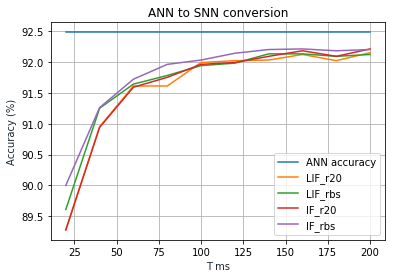

In [129]:
# Here we are running the SNN accuracy from above cell for different values of time scale
# and plotting the result
# Initializing seed 
np.random.seed(9001)

# Verification of ANN accuracy. We will get the same accuracy as in Keras
print("Verifying ANN accuracy with softmax")
n_tests = x_test.shape[0]
correct = 0
for i in range(n_tests):
    pred = ANN_prediction_softmax(x_test[i], y_test[i], W1)
    if pred == y_test[i]:
        correct += 1
ANN_acc = correct*100.0/n_tests
print('{} out of {} correct'.format(correct, n_tests))
print("Accuracy:", correct*100.0/n_tests)

NT_start = 20
NT_stop = 200
NT_step = 20
n_tests = x_test.shape[0]
# Initial SNN accuracy result with LIF neuron with r20
print("Checking initial SNN accuracy with LIF neuron with r20")
acc_LIF_r20_poisson = []
for NT in range(NT_start, NT_stop+1, NT_step):
    print("Simulation, T:{} ms".format(NT))
    correct = 0
    for i in range(n_tests):
        pred, V_layer, spikes_layer, spike_rate = SNN_prediction_LIF_r20(x_test[i], y_test[i], W1, NT)
        if pred == y_test[i]:
            correct += 1

    print('{} out of {} correct'.format(correct, n_tests))
    acc_LIF_r20_poisson.append(correct*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_LIF_r20_poisson)

# Initial SNN accuracy result with LIF neuron with rbs
print("Checking initial SNN accuracy with LIF neuron with rbs")
acc_LIF_rbs_poisson = []
for NT in range(NT_start, NT_stop+1, NT_step):
    print("Simulation, T:{} ms".format(NT))
    correct = 0
    for i in range(n_tests):
        pred, V_layer, spikes_layer, spike_rate = SNN_prediction_LIF_rbs(x_test[i], y_test[i], W1, NT)
        if pred == y_test[i]:
            correct += 1

    print('{} out of {} correct'.format(correct, n_tests))
    acc_LIF_rbs_poisson.append(correct*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_LIF_rbs_poisson)

# Initial SNN accuracy result with IF neuron with r20
print("Checking initial SNN accuracy with IF neuron with r20")
acc_IF_r20_poisson = []
for NT in range(NT_start, NT_stop+1, NT_step):
    print("Simulation, T:{} ms".format(NT))
    correct = 0
    for i in range(n_tests):
        pred, V_layer, spikes_layer, spike_rate = SNN_prediction_IF_r20(x_test[i], y_test[i], W1, NT)
        if pred == y_test[i]:
            correct += 1

    print('{} out of {} correct'.format(correct, n_tests))
    acc_IF_r20_poisson.append(correct*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_IF_r20_poisson)

# Initial SNN accuracy result with IF neuron with rbs
print("Checking initial SNN accuracy with IF neuron with rbs")
acc_IF_rbs_poisson = []
for NT in range(NT_start, NT_stop+1, NT_step):
    print("Simulation, T:{} ms".format(NT))
    correct = 0
    for i in range(n_tests):
        pred, V_layer, spikes_layer, spike_rate = SNN_prediction_IF_rbs(x_test[i], y_test[i], W1, NT)
        if pred == y_test[i]:
            correct += 1

    print('{} out of {} correct'.format(correct, n_tests))
    acc_IF_rbs_poisson.append(correct*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_IF_rbs_poisson)

# Plot the entire curves
x = range(NT_start,NT_stop+1, NT_step)
y = ANN_acc*np.ones(len(x))
plt.plot(x, y, label="ANN accuracy")
y = acc_LIF_r20_poisson
plt.plot(x, y, label="LIF_r20")
y = acc_LIF_rbs_poisson
plt.plot(x, y, label="LIF_rbs")
y = acc_IF_r20_poisson
plt.plot(x, y, label="IF_r20")
y = acc_IF_rbs_poisson
plt.plot(x, y, label="IF_rbs")
plt.title('ANN to SNN conversion')
plt.xlabel('T ms', color='#1C2833')
plt.ylabel('Accuracy (%)', color='#1C2833')
#plt.xscale('log')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('ANN2SNN_poisson_rate_based_prediction_correct.jpg')

# write the accuracies to a temp file 
with open("temp_ANN2SNN_poisson_rate_based_prediction_correct.txt", "w") as output:
    output.write("Simulation start T: {}ms and stop T: {}ms with step T: {}ms \n".format(NT_start,NT_stop, NT_step))
    output.write("Accuracy for ANN-SNN conversion for a single layer network with LIF neuron with r20 on MNIST dataset with poisson spike generation: ")
    output.write(str(acc_LIF_r20_poisson))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with LIF neuron with rbs on MNIST dataset with poisson spike generation:")
    output.write(str(acc_LIF_rbs_poisson))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with r20 on MNIST dataset with poisson spike generation:")
    output.write(str(acc_IF_r20_poisson))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with rbs on MNIST dataset with poisson spike generation:")
    output.write(str(acc_IF_rbs_poisson))

# Experiment 2: With output encoding: first spike; input encoding: Poisson 

In [131]:
# Functions for ANN and SNN predictions with first spike as output encoding
def SNN_prediction_LIF_r20(x, y, W1, NT):

    np.random.seed(9001)
    inp = x.flatten()

    # create poisson spike train
    s_inp = np.random.rand(W1.shape[1], NT)
    s_inp[:, 0] = 0
    for r in range(W1.shape[1]):
        s_inp[r, 1:] = s_inp[r, 1:] < inp[r]

    I = W1.dot(s_inp)
    #I[I < 0] = 0

    V_layer = []
    spikes_layer = []
    spike_rate = []
    # n is number of neurons in a layer
    for n in range(W1.shape[0]):
        vmem, st = LIF_r20(I[n], T=NT, tau=20, threshold = 1)
        V_layer.append(vmem)
        spikes_layer.append(st)
        spike_rate.append(len(st))
        #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

    #print("Output spikes:", spikes_layer)
    #print(spike_rate)
            
    if any(spike_rate)!=0:
        first_spike = NT
        for p, o in enumerate(spikes_layer):
            if o != []:
                #print(p, o)
                if min(o)<first_spike:
                    first_spike = min(o)   # min(o) = o[0]
                    prediction = p
                elif min(o)==first_spike:
                    #print("Two neurons spike at same time")
                    prediction = W1.shape[0]
        #print("first spiked neuron at time", prediction, first_spike)
        #print("prediction using first spike", prediction)
    else:
        prediction = W1.shape[0]
                
    return prediction, V_layer, spikes_layer, spike_rate

def SNN_prediction_LIF_rbs(x, y, W1, NT):

    np.random.seed(9001)
    inp = x.flatten()

    # create poisson spike train
    s_inp = np.random.rand(W1.shape[1], NT)
    s_inp[:, 0] = 0
    for r in range(W1.shape[1]):
        s_inp[r, 1:] = s_inp[r, 1:] < inp[r]

    I = W1.dot(s_inp)
    #I[I < 0] = 0

    V_layer = []
    spikes_layer = []
    spike_rate = []
    # n is number of neurons in a layer
    for n in range(W1.shape[0]):
        vmem, st = LIF_rbs(I[n], T=NT, tau=20, threshold = 1)
        V_layer.append(vmem)
        spikes_layer.append(st)
        spike_rate.append(len(st))
        #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

    #print("Output spikes:", spikes_layer)
    #print(spike_rate)
    
    if any(spike_rate)!=0:
        first_spike = NT
        for p, o in enumerate(spikes_layer):
            if o != []:
                #print(p, o)
                if min(o)<first_spike:
                    first_spike = min(o)   # min(o) = o[0]
                    prediction = p
                elif min(o)==first_spike:
                    #print("Two neurons spike at same time")
                    prediction = W1.shape[0]
        #print("first spiked neuron at time", prediction, first_spike)
        #print("prediction using first spike", prediction)
    else:
        prediction = W1.shape[0]

    return prediction, V_layer, spikes_layer, spike_rate

def SNN_prediction_IF_r20(x, y, W1, NT):

    np.random.seed(9001)
    inp = x.flatten()

    # create poisson spike train
    s_inp = np.random.rand(W1.shape[1], NT)
    s_inp[:, 0] = 0
    for r in range(W1.shape[1]):
        s_inp[r, 1:] = s_inp[r, 1:] < inp[r]

    I = W1.dot(s_inp)
    #I[I < 0] = 0

    V_layer = []
    spikes_layer = []
    spike_rate = []
    # n is number of neurons in a layer
    for n in range(W1.shape[0]):
        vmem, st = IF_r20(I[n], T=NT, tau=20, threshold = 1)
        V_layer.append(vmem)
        spikes_layer.append(st)
        spike_rate.append(len(st))
        #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

    #print("Output spikes:", spikes_layer)
    #print(spike_rate)

    if any(spike_rate)!=0:
        first_spike = NT
        for p, o in enumerate(spikes_layer):
            if o != []:
                #print(p, o)
                if min(o)<first_spike:
                    first_spike = min(o)   # min(o) = o[0]
                    prediction = p
                elif min(o)==first_spike:
                    #print("Two neurons spike at same time")
                    prediction = W1.shape[0]
        #print("first spiked neuron at time", prediction, first_spike)
        #print("prediction using first spike", prediction)
    else:
        prediction = W1.shape[0]

    return prediction, V_layer, spikes_layer, spike_rate

def SNN_prediction_IF_rbs(x, y, W1, NT):

    np.random.seed(9001)
    inp = x.flatten()

    # create poisson spike train
    s_inp = np.random.rand(W1.shape[1], NT)
    s_inp[:, 0] = 0
    for r in range(W1.shape[1]):
        s_inp[r, 1:] = s_inp[r, 1:] < inp[r]

    I = W1.dot(s_inp)
    #I[I < 0] = 0

    V_layer = []
    spikes_layer = []
    spike_rate = []
    # n is number of neurons in a layer
    for n in range(W1.shape[0]):
        vmem, st = IF_rbs(I[n], T=NT, tau=20, threshold = 1)
        V_layer.append(vmem)
        spikes_layer.append(st)
        spike_rate.append(len(st))
        #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

    #print("Output spikes:", spikes_layer)
    #print(spike_rate)

    if any(spike_rate)!=0:
        first_spike = NT
        for p, o in enumerate(spikes_layer):
            if o != []:
                #print(p, o)
                if min(o)<first_spike:
                    first_spike = min(o)   # min(o) = o[0]
                    prediction = p
                elif min(o)==first_spike:
                    #print("Two neurons spike at same time")
                    prediction = W1.shape[0]
        #print("first spiked neuron at time", prediction, first_spike)
        #print("prediction using first spike", prediction)
    else:
        prediction = W1.shape[0]

    return prediction, V_layer, spikes_layer, spike_rate

Verifying ANN accuracy with softmax
9248 out of 10000 correct
Accuracy: 92.48
Checking initial SNN accuracy with LIF neuron with r20
Simulation, T:20 ms
9003 out of 10000 correct
Simulation, T:40 ms
8981 out of 10000 correct
Simulation, T:60 ms
9019 out of 10000 correct
Simulation, T:80 ms
9021 out of 10000 correct
Simulation, T:100 ms
9021 out of 10000 correct
Simulation, T:120 ms
9018 out of 10000 correct
Simulation, T:140 ms
9032 out of 10000 correct
Simulation, T:160 ms
9031 out of 10000 correct
Simulation, T:180 ms
9009 out of 10000 correct
Simulation, T:200 ms
9024 out of 10000 correct
List of accuracy for different simulation time, T [90.03, 89.81, 90.19, 90.21, 90.21, 90.18, 90.32, 90.31, 90.09, 90.24]
Checking initial SNN accuracy with LIF neuron with rbs
Simulation, T:20 ms
9003 out of 10000 correct
Simulation, T:40 ms
8981 out of 10000 correct
Simulation, T:60 ms
9019 out of 10000 correct
Simulation, T:80 ms
9021 out of 10000 correct
Simulation, T:100 ms
9021 out of 10000 co

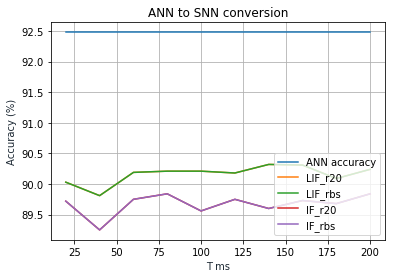

In [133]:
# Here we are running the SNN accuracy for different values of time scale with above cell functions
# and plotting the result
# Initializing seed 
np.random.seed(9001)

# Verification of ANN accuracy. We will get the same accuracy as in Keras
print("Verifying ANN accuracy with softmax")
n_tests = x_test.shape[0]
correct = 0
for i in range(n_tests):
    pred = ANN_prediction_softmax(x_test[i], y_test[i], W1)
    if pred == y_test[i]:
        correct += 1
ANN_acc = correct*100.0/n_tests
print('{} out of {} correct'.format(correct, n_tests))
print("Accuracy:", correct*100.0/n_tests)

NT_start = 20
NT_stop = 200
NT_step = 20
n_tests = x_test.shape[0]
# Initial SNN accuracy result with LIF neuron with r20
print("Checking initial SNN accuracy with LIF neuron with r20")
acc_LIF_r20_poisson = []
for NT in range(NT_start, NT_stop+1, NT_step):
    print("Simulation, T:{} ms".format(NT))
    correct = 0
    for i in range(n_tests):
        pred, V_layer, spikes_layer, spike_rate = SNN_prediction_LIF_r20(x_test[i], y_test[i], W1, NT)
        if pred == y_test[i]:
            correct += 1

    print('{} out of {} correct'.format(correct, n_tests))
    acc_LIF_r20_poisson.append(correct*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_LIF_r20_poisson)

# Initial SNN accuracy result with LIF neuron with rbs
print("Checking initial SNN accuracy with LIF neuron with rbs")
acc_LIF_rbs_poisson = []
for NT in range(NT_start, NT_stop+1, NT_step):
    print("Simulation, T:{} ms".format(NT))
    correct = 0
    for i in range(n_tests):
        pred, V_layer, spikes_layer, spike_rate = SNN_prediction_LIF_rbs(x_test[i], y_test[i], W1, NT)
        if pred == y_test[i]:
            correct += 1

    print('{} out of {} correct'.format(correct, n_tests))
    acc_LIF_rbs_poisson.append(correct*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_LIF_rbs_poisson)

# Initial SNN accuracy result with IF neuron with r20
print("Checking initial SNN accuracy with IF neuron with r20")
acc_IF_r20_poisson = []
for NT in range(NT_start, NT_stop+1, NT_step):
    print("Simulation, T:{} ms".format(NT))
    correct = 0
    for i in range(n_tests):
        pred, V_layer, spikes_layer, spike_rate = SNN_prediction_IF_r20(x_test[i], y_test[i], W1, NT)
        if pred == y_test[i]:
            correct += 1

    print('{} out of {} correct'.format(correct, n_tests))
    acc_IF_r20_poisson.append(correct*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_IF_r20_poisson)

# Initial SNN accuracy result with IF neuron with rbs
print("Checking initial SNN accuracy with IF neuron with rbs")
acc_IF_rbs_poisson = []
for NT in range(NT_start, NT_stop+1, NT_step):
    print("Simulation, T:{} ms".format(NT))
    correct = 0
    for i in range(n_tests):
        pred, V_layer, spikes_layer, spike_rate = SNN_prediction_IF_rbs(x_test[i], y_test[i], W1, NT)
        if pred == y_test[i]:
            correct += 1

    print('{} out of {} correct'.format(correct, n_tests))
    acc_IF_rbs_poisson.append(correct*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_IF_rbs_poisson)

# Plot the entire curves
x = range(NT_start,NT_stop+1, NT_step)
y = ANN_acc*np.ones(len(x))
plt.plot(x, y, label="ANN accuracy")
y = acc_LIF_r20_poisson
plt.plot(x, y, label="LIF_r20")
y = acc_LIF_rbs_poisson
plt.plot(x, y, label="LIF_rbs")
y = acc_IF_r20_poisson
plt.plot(x, y, label="IF_r20")
y = acc_IF_rbs_poisson
plt.plot(x, y, label="IF_rbs")
plt.title('ANN to SNN conversion')
plt.xlabel('T ms', color='#1C2833')
plt.ylabel('Accuracy (%)', color='#1C2833')
#plt.xscale('log')
plt.legend(loc='upper right')
plt.grid()
plt.savefig('ANN2SNN_poisson_first_spike_based_prediction.jpg')

# write the accuracies to a temp file 
with open("temp_ANN2SNN_poisson_first_spike_based_prediction.txt", "w") as output:
    output.write("Simulation start T: {}ms and stop T: {}ms with step T: {}ms \n".format(NT_start,NT_stop, NT_step))
    output.write("Accuracy for ANN-SNN conversion for a single layer network with LIF neuron with r20 on MNIST dataset with poisson spike generation: ")
    output.write(str(acc_LIF_r20_poisson))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with LIF neuron with rbs on MNIST dataset with poisson spike generation:")
    output.write(str(acc_LIF_rbs_poisson))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with r20 on MNIST dataset with poisson spike generation:")
    output.write(str(acc_IF_r20_poisson))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with rbs on MNIST dataset with poisson spike generation:")
    output.write(str(acc_IF_rbs_poisson))

# Experiment 3: With output encoding: rate and first spike; input encoding: Poisson

In [160]:
# Functions for ANN and SNN predictions with both rate and first spike as output encoding
def SNN_prediction_LIF_r20(x, y, W1, NT):

    np.random.seed(9001)
    inp = x.flatten()

    # create poisson spike train
    s_inp = np.random.rand(W1.shape[1], NT)
    s_inp[:, 0] = 0
    for r in range(W1.shape[1]):
        s_inp[r, 1:] = s_inp[r, 1:] < inp[r]

    I = W1.dot(s_inp)
    #I[I < 0] = 0

    V_layer = []
    spikes_layer = []
    spike_rate = []
    # n is number of neurons in a layer
    for n in range(W1.shape[0]):
        vmem, st = LIF_r20(I[n], T=NT, tau=20, threshold = 1)
        V_layer.append(vmem)
        spikes_layer.append(st)
        spike_rate.append(len(st))
        #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

    #print("Output spikes:", spikes_layer)
    #print(spike_rate)
            
    if any(spike_rate)!=0:
        max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
        #print("Index of max of spike rate", max_spike_rate_index)
        if len(max_spike_rate_index)>1:
            #print("Two neurons spike at same rate")
            first_spike_both = NT
            for l in range(len(max_spike_rate_index)):
                #print("First index",l, spikes_layer[max_spike_rate_index[l]])
                if min(spikes_layer[max_spike_rate_index[l]])<first_spike_both:
                    first_spike_both = min(spikes_layer[max_spike_rate_index[l]])   # min(o) = o[0]
                    prediction = max_spike_rate_index[l]
                elif min(spikes_layer[max_spike_rate_index[l]])==first_spike_both:
                    #print("Two neurons spike at same time")
                    prediction = W1.shape[0]
            #print("first spiked neuron at time with same spike rate", prediction_both, first_spike_both)
        else:
            prediction = max_spike_rate_index[0]
    else:
        prediction = W1.shape[0]
                
    return prediction, V_layer, spikes_layer, spike_rate

def SNN_prediction_LIF_rbs(x, y, W1, NT):

    np.random.seed(9001)
    inp = x.flatten()

    # create poisson spike train
    s_inp = np.random.rand(W1.shape[1], NT)
    s_inp[:, 0] = 0
    for r in range(W1.shape[1]):
        s_inp[r, 1:] = s_inp[r, 1:] < inp[r]

    I = W1.dot(s_inp)
    #I[I < 0] = 0

    V_layer = []
    spikes_layer = []
    spike_rate = []
    # n is number of neurons in a layer
    for n in range(W1.shape[0]):
        vmem, st = LIF_rbs(I[n], T=NT, tau=20, threshold = 1)
        V_layer.append(vmem)
        spikes_layer.append(st)
        spike_rate.append(len(st))
        #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

    #print("Output spikes:", spikes_layer)
    #print(spike_rate)
    
    if any(spike_rate)!=0:
        max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
        #print("Index of max of spike rate", max_spike_rate_index)
        if len(max_spike_rate_index)>1:
            #print("Two neurons spike at same rate")
            first_spike_both = NT
            for l in range(len(max_spike_rate_index)):
                #print("First index",l, spikes_layer[max_spike_rate_index[l]])
                if min(spikes_layer[max_spike_rate_index[l]])<first_spike_both:
                    first_spike_both = min(spikes_layer[max_spike_rate_index[l]])   # min(o) = o[0]
                    prediction = max_spike_rate_index[l]
                elif min(spikes_layer[max_spike_rate_index[l]])==first_spike_both:
                    #print("Two neurons spike at same time")
                    prediction = W1.shape[0]
            #print("first spiked neuron at time with same spike rate", prediction_both, first_spike_both)
        else:
            prediction = max_spike_rate_index[0]
    else:
        prediction = W1.shape[0]

    return prediction, V_layer, spikes_layer, spike_rate

def SNN_prediction_IF_r20(x, y, W1, NT):

    np.random.seed(9001)
    inp = x.flatten()

    # create poisson spike train
    s_inp = np.random.rand(W1.shape[1], NT)
    s_inp[:, 0] = 0
    for r in range(W1.shape[1]):
        s_inp[r, 1:] = s_inp[r, 1:] < inp[r]

    I = W1.dot(s_inp)
    #I[I < 0] = 0

    V_layer = []
    spikes_layer = []
    spike_rate = []
    # n is number of neurons in a layer
    for n in range(W1.shape[0]):
        vmem, st = IF_r20(I[n], T=NT, tau=20, threshold = 1)
        V_layer.append(vmem)
        spikes_layer.append(st)
        spike_rate.append(len(st))
        #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

    #print("Output spikes:", spikes_layer)
    #print(spike_rate)

    if any(spike_rate)!=0:
        max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
        #print("Index of max of spike rate", max_spike_rate_index)
        if len(max_spike_rate_index)>1:
            #print("Two neurons spike at same rate")
            first_spike_both = NT
            for l in range(len(max_spike_rate_index)):
                #print("First index",l, spikes_layer[max_spike_rate_index[l]])
                if min(spikes_layer[max_spike_rate_index[l]])<first_spike_both:
                    first_spike_both = min(spikes_layer[max_spike_rate_index[l]])   # min(o) = o[0]
                    prediction = max_spike_rate_index[l]
                elif min(spikes_layer[max_spike_rate_index[l]])==first_spike_both:
                    #print("Two neurons spike at same time")
                    prediction = W1.shape[0]
            #print("first spiked neuron at time with same spike rate", prediction_both, first_spike_both)
        else:
            prediction = max_spike_rate_index[0]
    else:
        prediction = W1.shape[0]

    return prediction, V_layer, spikes_layer, spike_rate

def SNN_prediction_IF_rbs(x, y, W1, NT):

    np.random.seed(9001)
    inp = x.flatten()

    # create poisson spike train
    s_inp = np.random.rand(W1.shape[1], NT)
    s_inp[:, 0] = 0
    for r in range(W1.shape[1]):
        s_inp[r, 1:] = s_inp[r, 1:] < inp[r]

    I = W1.dot(s_inp)
    #I[I < 0] = 0

    V_layer = []
    spikes_layer = []
    spike_rate = []
    # n is number of neurons in a layer
    for n in range(W1.shape[0]):
        vmem, st = IF_rbs(I[n], T=NT, tau=20, threshold = 1)
        V_layer.append(vmem)
        spikes_layer.append(st)
        spike_rate.append(len(st))
        #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

    #print("Output spikes:", spikes_layer)
    #print(spike_rate)

    if any(spike_rate)!=0:
        max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
        #print("Index of max of spike rate", max_spike_rate_index)
        if len(max_spike_rate_index)>1:
            #print("Two neurons spike at same rate")
            first_spike_both = NT
            for l in range(len(max_spike_rate_index)):
                #print("First index",l, spikes_layer[max_spike_rate_index[l]])
                if min(spikes_layer[max_spike_rate_index[l]])<first_spike_both:
                    first_spike_both = min(spikes_layer[max_spike_rate_index[l]])   # min(o) = o[0]
                    prediction = max_spike_rate_index[l]
                elif min(spikes_layer[max_spike_rate_index[l]])==first_spike_both:
                    #print("Two neurons spike at same time")
                    prediction = W1.shape[0]
            #print("first spiked neuron at time with same spike rate", prediction_both, first_spike_both)
        else:
            prediction = max_spike_rate_index[0]
    else:
        prediction = W1.shape[0]

    return prediction, V_layer, spikes_layer, spike_rate

Verifying ANN accuracy with softmax
9248 out of 10000 correct
Accuracy: 92.48
Checking initial SNN accuracy with LIF neuron with r20
Simulation, T:20 ms
9097 out of 10000 correct
Simulation, T:40 ms
9164 out of 10000 correct
Simulation, T:60 ms
9198 out of 10000 correct
Simulation, T:80 ms
9194 out of 10000 correct
Simulation, T:100 ms
9223 out of 10000 correct
Simulation, T:120 ms
9219 out of 10000 correct
Simulation, T:140 ms
9226 out of 10000 correct
Simulation, T:160 ms
9228 out of 10000 correct
Simulation, T:180 ms
9220 out of 10000 correct
Simulation, T:200 ms
9234 out of 10000 correct
List of accuracy for different simulation time, T [90.97, 91.64, 91.98, 91.94, 92.23, 92.19, 92.26, 92.28, 92.2, 92.34]
Checking initial SNN accuracy with LIF neuron with rbs
Simulation, T:20 ms
9114 out of 10000 correct
Simulation, T:40 ms
9183 out of 10000 correct
Simulation, T:60 ms
9205 out of 10000 correct
Simulation, T:80 ms
9205 out of 10000 correct
Simulation, T:100 ms
9220 out of 10000 cor

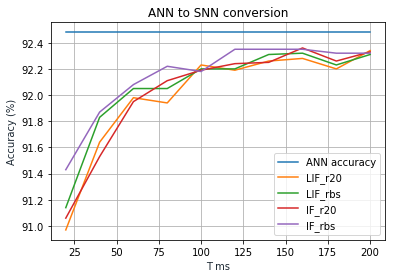

In [139]:
# Here we are running the SNN accuracy for different values of time scale with above cell functions
# Experiment for both spike rate and first spike encoding scheme
# and plotting the result
# Initializing seed 
np.random.seed(9001)

# Verification of ANN accuracy. We will get the same accuracy as in Keras
print("Verifying ANN accuracy with softmax")
n_tests = x_test.shape[0]
correct = 0
for i in range(n_tests):
    pred = ANN_prediction_softmax(x_test[i], y_test[i], W1)
    if pred == y_test[i]:
        correct += 1
ANN_acc = correct*100.0/n_tests
print('{} out of {} correct'.format(correct, n_tests))
print("Accuracy:", correct*100.0/n_tests)

NT_start = 20
NT_stop = 200
NT_step = 20
n_tests = x_test.shape[0]
# Initial SNN accuracy result with LIF neuron with r20
print("Checking initial SNN accuracy with LIF neuron with r20")
acc_LIF_r20_poisson = []
for NT in range(NT_start, NT_stop+1, NT_step):
    print("Simulation, T:{} ms".format(NT))
    correct = 0
    for i in range(n_tests):
        pred, V_layer, spikes_layer, spike_rate = SNN_prediction_LIF_r20(x_test[i], y_test[i], W1, NT)
        if pred == y_test[i]:
            correct += 1

    print('{} out of {} correct'.format(correct, n_tests))
    acc_LIF_r20_poisson.append(correct*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_LIF_r20_poisson)

# Initial SNN accuracy result with LIF neuron with rbs
print("Checking initial SNN accuracy with LIF neuron with rbs")
acc_LIF_rbs_poisson = []
for NT in range(NT_start, NT_stop+1, NT_step):
    print("Simulation, T:{} ms".format(NT))
    correct = 0
    for i in range(n_tests):
        pred, V_layer, spikes_layer, spike_rate = SNN_prediction_LIF_rbs(x_test[i], y_test[i], W1, NT)
        if pred == y_test[i]:
            correct += 1

    print('{} out of {} correct'.format(correct, n_tests))
    acc_LIF_rbs_poisson.append(correct*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_LIF_rbs_poisson)

# Initial SNN accuracy result with IF neuron with r20
print("Checking initial SNN accuracy with IF neuron with r20")
acc_IF_r20_poisson = []
for NT in range(NT_start, NT_stop+1, NT_step):
    print("Simulation, T:{} ms".format(NT))
    correct = 0
    for i in range(n_tests):
        pred, V_layer, spikes_layer, spike_rate = SNN_prediction_IF_r20(x_test[i], y_test[i], W1, NT)
        if pred == y_test[i]:
            correct += 1

    print('{} out of {} correct'.format(correct, n_tests))
    acc_IF_r20_poisson.append(correct*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_IF_r20_poisson)

# Initial SNN accuracy result with IF neuron with rbs
print("Checking initial SNN accuracy with IF neuron with rbs")
acc_IF_rbs_poisson = []
for NT in range(NT_start, NT_stop+1, NT_step):
    print("Simulation, T:{} ms".format(NT))
    correct = 0
    for i in range(n_tests):
        pred, V_layer, spikes_layer, spike_rate = SNN_prediction_IF_rbs(x_test[i], y_test[i], W1, NT)
        if pred == y_test[i]:
            correct += 1

    print('{} out of {} correct'.format(correct, n_tests))
    acc_IF_rbs_poisson.append(correct*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_IF_rbs_poisson)

# Plot the entire curves
x = range(NT_start,NT_stop+1, NT_step)
y = ANN_acc*np.ones(len(x))
plt.plot(x, y, label="ANN accuracy")
y = acc_LIF_r20_poisson
plt.plot(x, y, label="LIF_r20")
y = acc_LIF_rbs_poisson
plt.plot(x, y, label="LIF_rbs")
y = acc_IF_r20_poisson
plt.plot(x, y, label="IF_r20")
y = acc_IF_rbs_poisson
plt.plot(x, y, label="IF_rbs")
plt.title('ANN to SNN conversion')
plt.xlabel('T ms', color='#1C2833')
plt.ylabel('Accuracy (%)', color='#1C2833')
#plt.xscale('log')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('ANN2SNN_poisson_rate_&_first_spike_based_prediction.jpg')

# write the accuracies to a temp file 
with open("temp_ANN2SNN_poisson_rate_&_first_spike_based_prediction.txt", "w") as output:
    output.write("Simulation start T: {}ms and stop T: {}ms with step T: {}ms \n".format(NT_start,NT_stop, NT_step))
    output.write("Accuracy for ANN-SNN conversion for a single layer network with LIF neuron with r20 on MNIST dataset with poisson spike generation: ")
    output.write(str(acc_LIF_r20_poisson))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with LIF neuron with rbs on MNIST dataset with poisson spike generation:")
    output.write(str(acc_LIF_rbs_poisson))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with r20 on MNIST dataset with poisson spike generation:")
    output.write(str(acc_IF_r20_poisson))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with rbs on MNIST dataset with poisson spike generation:")
    output.write(str(acc_IF_rbs_poisson))

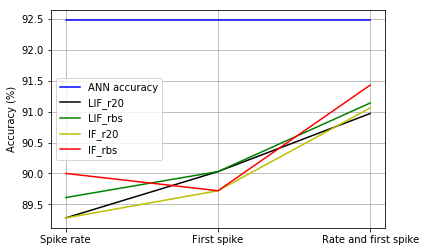

In [153]:
# Plot the SNN accuracies for Poisson spike train input encoding at T=20ms 
# for 5 different neuron cases for 3 different output encoding

output_encode = ["Spike rate", "First spike", "Rate and first spike"]
accuracies_LIF_r20 = [89.28, 90.03, 90.97 ]
accuracies_LIF_rbs = [89.61, 90.03, 91.14]
accuracies_IF_r20 = [89.28, 89.72, 91.06]
accuracies_IF_rbs = [90.0, 89.72, 91.43]
ANN_accuracy = 92.48*np.ones((len(accuracies_LIF_r20)))
x = list(range(len(accuracies_LIF_r20)))
plt.ylabel("Accuracy (%)")
plt.plot(x, ANN_accuracy, label='ANN accuracy', color='b')
plt.plot(x, accuracies_LIF_r20, label='LIF_r20', color='k')
plt.plot(x, accuracies_LIF_rbs, label='LIF_rbs', color='g')
plt.plot(x, accuracies_IF_r20, label='IF_r20', color='y')
plt.plot(x, accuracies_IF_rbs, label='IF_rbs', color='r')
plt.xticks(x, output_encode)
plt.legend()
plt.grid()
plt.savefig('ANN2SNN_poisson_T_20.jpg')

# Experiment 4: With input coding of actual input 

In [156]:
# Running the combined above experiments on acutual input
# Above examples used poisson spike trains
# Now, lets look at how the network behaves with input samples used directly in input layer
# Lets rewrite the SNN_prediction function for input samples without poisson spike trains

def LIF_r20_wo_I_of_t(I, T, tau, threshold):
    V = [0]
    spikes = []
    for t in range(T):
        # Threshold
        if V[t] >= threshold:
            V[t] = 0
            spikes.append(t)
        # Membrane dynamics  R=1
        dv = (1/tau)*(-V[t] + I)
        # Save data
        V.append(V[t] + dv)
    return V, spikes

def LIF_rbs_wo_I_of_t(I, T, tau, threshold):
    V = [0]
    spikes = []
    for t in range(T):
        # Threshold
        if V[t] >= threshold:
            V[t] -= threshold
            spikes.append(t)
        # Membrane dynamics  R=1
        dv = (1/tau)*(-V[t] + I)
        # Save data
        V.append(V[t] + dv)
    return V, spikes

def IF_r20_wo_I_of_t(I, T, tau, threshold):
    V = [0]
    spikes = []
    for t in range(T):
        # Threshold
        if V[t] >= threshold:
            V[t] = 0
            spikes.append(t)
        # Membrane dynamics  R=1
        dv = (1/tau)*(I)
        # Save data
        V.append(V[t] + dv)
    return V, spikes

def IF_rbs_wo_I_of_t(I, T, tau, threshold):
    V = [0]
    spikes = []
    for t in range(T):
        # Threshold
        if V[t] >= threshold:
            V[t] -= threshold
            spikes.append(t)
        # Membrane dynamics  R=1
        dv = (1/tau)*(I)
        # Save data
        V.append(V[t] + dv)
    return V, spikes

def spikes(x, y, NT, N):
    
    inp = x.flatten()
    V_layer = []
    spikes_layer = []
    spike_rate = []
    s_inp = np.zeros((N, NT))
    for n in range(N):
        vmem, st = IF_rbs_wo_I_of_t(inp[n], T=NT, tau=20, threshold = 1)
        V_layer.append(vmem)
        spikes_layer.append(st)
        spike_rate.append(len(st))
        #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))
    if any(spike_rate)== []:
        print("No spike created")
    for n in range(N):
        s_inp[spikes_layer[n]] = 1
    print("spike time and spike train", spikes_layer[0], spike_rate[0], s_inp[0])
    
    return s_inp

Experiment 4 with input encoding as direct input sample without conversion to Poisson spikes
LIF_r20
List of accuracy for different simulation time, T [84.79, 89.0, 89.93, 90.29, 90.42, 90.41, 90.46, 90.47, 90.46, 90.5]
List of accuracy for different simulation time, T [88.59, 90.27, 90.42, 90.53, 90.54, 90.54, 90.55, 90.55, 90.55, 90.56]
List of accuracy for different simulation time, T [88.59, 90.27, 90.42, 90.53, 90.54, 90.54, 90.55, 90.55, 90.55, 90.56]
LIF_rbs
List of accuracy for different simulation time, T [86.03, 89.99, 90.73, 91.26, 91.47, 91.56, 91.67, 91.68, 91.77, 91.84]
List of accuracy for different simulation time, T [88.59, 90.27, 90.42, 90.53, 90.54, 90.54, 90.55, 90.55, 90.55, 90.56]
List of accuracy for different simulation time, T [88.91, 91.1, 91.39, 91.6, 91.65, 91.79, 91.81, 91.8, 91.87, 91.9]
IF_r20
List of accuracy for different simulation time, T [84.78, 88.73, 89.56, 90.04, 90.16, 90.22, 90.24, 90.25, 90.26, 90.26]
List of accuracy for different simulation t

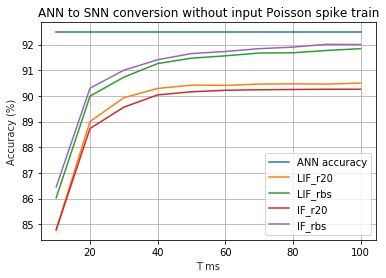

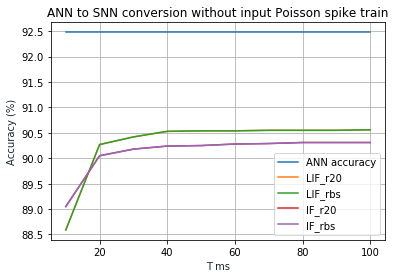

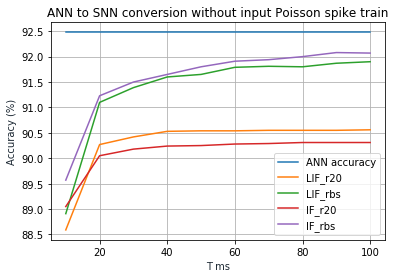

In [158]:
# Initializing seed 
np.random.seed(9001)

print("Experiment 4 with input encoding as direct input sample without conversion to Poisson spikes")
n_tests = x_test.shape[0]
T_start = 10
T_stop = 100
T_step = 10

print("LIF_r20")
acc_LIF_r20_spike_rate = []
acc_LIF_r20_first_spike = []
acc_LIF_r20_both = []
for T in range(T_start, T_stop+1, T_step):
    correct_spike_rate = 0
    correct_first_spike = 0
    correct_both = 0
    for i in range(n_tests):
        np.random.seed(9001)
    
        inp = x_test[i].flatten()

        I = W1.dot(inp)
        #I[I < 0] = 0

        V_layer = []
        spikes_layer = []
        spike_rate = []
        # n is number of neurons in a layer
        for n in range(W1.shape[0]):
            vmem, st = LIF_r20_wo_I_of_t(I[n], T, tau=20, threshold = 1)
            V_layer.append(vmem)
            spikes_layer.append(st)
            spike_rate.append(len(st))
            #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

        #print("Output spikes:", spikes_layer)
        #print("Output spikes rate:", spike_rate)
    
        if any(spike_rate)!=0:
            #print("Spike rate output encoding")
            max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
            #print("Index of max of spike rate", max_spike_rate_index)
            if len(max_spike_rate_index)>1:
                #print("Two neurons spike at same rate")
                prediction_spike_rate = W1.shape[0]
            else:
                prediction_spike_rate = np.argmax(spike_rate)
            #print("prediction using spike rate", prediction_spike_rate)
            if prediction_spike_rate == y_test[i]:
                correct_spike_rate += 1
                #print("target output & actual output", y_test[i], prediction_spike_rate)
    
            #print("First spike output encoding")
            #prediction_first_spike = [i for i, o in enumerate(spikes_layer) for u, v in enumerate(o) if v == min(o)]
            first_spike = T
            for p, o in enumerate(spikes_layer):
                if o != []:
                    #print(p, o)
                    if min(o)<first_spike:
                        first_spike = min(o)   # min(o) = o[0]
                        prediction_first_spike = p
                    elif min(o)==first_spike:
                        #print("Two neurons spike at same time")
                        prediction_first_spike = W1.shape[0]
            #print("first spiked neuron at time", prediction_first_spike, first_spike)
            #print("prediction using first spike", prediction_first_spike)
            if prediction_first_spike == y_test[i]:
                correct_first_spike += 1
                #print("target output & actual output", y_test[i], prediction_first_spike)
        
            #print("Spike rate and first spike output encoding")
            max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
            #print("Index of max of spike rate", max_spike_rate_index)
            if len(max_spike_rate_index)>1:
                #print("Two neurons spike at same rate")
                first_spike_both = T
                for l in range(len(max_spike_rate_index)):
                    #print("First index",l, spikes_layer[max_spike_rate_index[l]])
                    if min(spikes_layer[max_spike_rate_index[l]])<first_spike_both:
                        first_spike_both = min(spikes_layer[max_spike_rate_index[l]])   # min(o) = o[0]
                        prediction_both = max_spike_rate_index[l]
                    elif min(spikes_layer[max_spike_rate_index[l]])==first_spike_both:
                        #print("Two neurons spike at same time")
                        prediction_both = W1.shape[0]
                #print("first spiked neuron at time with same spike rate", prediction_both, first_spike_both)
            else:
                prediction_both = max_spike_rate_index[0]
            if prediction_both == y_test[i]:
                correct_both += 1
            #print("target output & actual output", y_test[i], prediction_both)
    
        #print("prediction using both max rate and first spike", prediction_both)
    acc_LIF_r20_spike_rate.append(correct_spike_rate*100.0/n_tests)
    acc_LIF_r20_first_spike.append(correct_first_spike*100.0/n_tests)
    acc_LIF_r20_both.append(correct_both*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_LIF_r20_spike_rate)
print("List of accuracy for different simulation time, T", acc_LIF_r20_first_spike)
print("List of accuracy for different simulation time, T", acc_LIF_r20_both)

print("LIF_rbs")
acc_LIF_rbs_spike_rate = []
acc_LIF_rbs_first_spike = []
acc_LIF_rbs_both = []
for T in range(T_start, T_stop+1, T_step):
    correct_spike_rate = 0
    correct_first_spike = 0
    correct_both = 0
    for i in range(n_tests):
        np.random.seed(9001)
    
        inp = x_test[i].flatten()

        I = W1.dot(inp)
        #I[I < 0] = 0

        V_layer = []
        spikes_layer = []
        spike_rate = []
        # n is number of neurons in a layer
        for n in range(W1.shape[0]):
            vmem, st = LIF_rbs_wo_I_of_t(I[n], T, tau=20, threshold = 1)
            V_layer.append(vmem)
            spikes_layer.append(st)
            spike_rate.append(len(st))
            #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

        #print("Output spikes:", spikes_layer)
        #print("Output spikes rate:", spike_rate)
    
        if any(spike_rate)!=0:
            #print("Spike rate output encoding")
            max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
            #print("Index of max of spike rate", max_spike_rate_index)
            if len(max_spike_rate_index)>1:
                #print("Two neurons spike at same rate")
                prediction_spike_rate = W1.shape[0]
            else:
                prediction_spike_rate = np.argmax(spike_rate)
            #print("prediction using spike rate", prediction_spike_rate)
            if prediction_spike_rate == y_test[i]:
                correct_spike_rate += 1
                #print("target output & actual output", y_test[i], prediction_spike_rate)
    
            #print("First spike output encoding")
            #prediction_first_spike = [i for i, o in enumerate(spikes_layer) for u, v in enumerate(o) if v == min(o)]
            first_spike = T
            for p, o in enumerate(spikes_layer):
                if o != []:
                    #print(p, o)
                    if min(o)<first_spike:
                        first_spike = min(o)   # min(o) = o[0]
                        prediction_first_spike = p
                    elif min(o)==first_spike:
                        #print("Two neurons spike at same time")
                        prediction_first_spike = W1.shape[0]
            #print("first spiked neuron at time", prediction_first_spike, first_spike)
            #print("prediction using first spike", prediction_first_spike)
            if prediction_first_spike == y_test[i]:
                correct_first_spike += 1
                #print("target output & actual output", y_test[i], prediction_first_spike)
        
            #print("Spike rate and first spike output encoding")
            max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
            #print("Index of max of spike rate", max_spike_rate_index)
            if len(max_spike_rate_index)>1:
                #print("Two neurons spike at same rate")
                first_spike_both = T
                for l in range(len(max_spike_rate_index)):
                    #print("First index",l, spikes_layer[max_spike_rate_index[l]])
                    if min(spikes_layer[max_spike_rate_index[l]])<first_spike_both:
                        first_spike_both = min(spikes_layer[max_spike_rate_index[l]])   # min(o) = o[0]
                        prediction_both = max_spike_rate_index[l]
                    elif min(spikes_layer[max_spike_rate_index[l]])==first_spike_both:
                        #print("Two neurons spike at same time")
                        prediction_both = W1.shape[0]
                #print("first spiked neuron at time with same spike rate", prediction_both, first_spike_both)
            else:
                prediction_both = max_spike_rate_index[0]
            if prediction_both == y_test[i]:
                correct_both += 1
            #print("target output & actual output", y_test[i], prediction_both)
    
        #print("prediction using both max rate and first spike", prediction_both)
    acc_LIF_rbs_spike_rate.append(correct_spike_rate*100.0/n_tests)
    acc_LIF_rbs_first_spike.append(correct_first_spike*100.0/n_tests)
    acc_LIF_rbs_both.append(correct_both*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_LIF_rbs_spike_rate)
print("List of accuracy for different simulation time, T", acc_LIF_rbs_first_spike)
print("List of accuracy for different simulation time, T", acc_LIF_rbs_both)


print("IF_r20")
acc_IF_r20_spike_rate = []
acc_IF_r20_first_spike = []
acc_IF_r20_both = []
for T in range(T_start, T_stop+1, T_step):
    correct_spike_rate = 0
    correct_first_spike = 0
    correct_both = 0
    for i in range(n_tests):
        np.random.seed(9001)
    
        inp = x_test[i].flatten()

        I = W1.dot(inp)
        #I[I < 0] = 0

        V_layer = []
        spikes_layer = []
        spike_rate = []
        # n is number of neurons in a layer
        for n in range(W1.shape[0]):
            vmem, st = IF_r20_wo_I_of_t(I[n], T, tau=20, threshold = 1)
            V_layer.append(vmem)
            spikes_layer.append(st)
            spike_rate.append(len(st))
            #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

        #print("Output spikes:", spikes_layer)
        #print("Output spikes rate:", spike_rate)
    
        if any(spike_rate)!=0:
            #print("Spike rate output encoding")
            max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
            #print("Index of max of spike rate", max_spike_rate_index)
            if len(max_spike_rate_index)>1:
                #print("Two neurons spike at same rate")
                prediction_spike_rate = W1.shape[0]
            else:
                prediction_spike_rate = np.argmax(spike_rate)
            #print("prediction using spike rate", prediction_spike_rate)
            if prediction_spike_rate == y_test[i]:
                correct_spike_rate += 1
                #print("target output & actual output", y_test[i], prediction_spike_rate)
    
            #print("First spike output encoding")
            #prediction_first_spike = [i for i, o in enumerate(spikes_layer) for u, v in enumerate(o) if v == min(o)]
            first_spike = T
            for p, o in enumerate(spikes_layer):
                if o != []:
                    #print(p, o)
                    if min(o)<first_spike:
                        first_spike = min(o)   # min(o) = o[0]
                        prediction_first_spike = p
                    elif min(o)==first_spike:
                        #print("Two neurons spike at same time")
                        prediction_first_spike = W1.shape[0]
            #print("first spiked neuron at time", prediction_first_spike, first_spike)
            #print("prediction using first spike", prediction_first_spike)
            if prediction_first_spike == y_test[i]:
                correct_first_spike += 1
                #print("target output & actual output", y_test[i], prediction_first_spike)
        
            #print("Spike rate and first spike output encoding")
            max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
            #print("Index of max of spike rate", max_spike_rate_index)
            if len(max_spike_rate_index)>1:
                #print("Two neurons spike at same rate")
                first_spike_both = T
                for l in range(len(max_spike_rate_index)):
                    #print("First index",l, spikes_layer[max_spike_rate_index[l]])
                    if min(spikes_layer[max_spike_rate_index[l]])<first_spike_both:
                        first_spike_both = min(spikes_layer[max_spike_rate_index[l]])   # min(o) = o[0]
                        prediction_both = max_spike_rate_index[l]
                    elif min(spikes_layer[max_spike_rate_index[l]])==first_spike_both:
                        #print("Two neurons spike at same time")
                        prediction_both = W1.shape[0]
                #print("first spiked neuron at time with same spike rate", prediction_both, first_spike_both)
            else:
                prediction_both = max_spike_rate_index[0]
            if prediction_both == y_test[i]:
                correct_both += 1
            #print("target output & actual output", y_test[i], prediction_both)
    
        #print("prediction using both max rate and first spike", prediction_both)
    acc_IF_r20_spike_rate.append(correct_spike_rate*100.0/n_tests)
    acc_IF_r20_first_spike.append(correct_first_spike*100.0/n_tests)
    acc_IF_r20_both.append(correct_both*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_IF_r20_spike_rate)
print("List of accuracy for different simulation time, T", acc_IF_r20_first_spike)
print("List of accuracy for different simulation time, T", acc_IF_r20_both)

print("IF_rbs")
acc_IF_rbs_spike_rate = []
acc_IF_rbs_first_spike = []
acc_IF_rbs_both = []
for T in range(T_start, T_stop+1, T_step):
    correct_spike_rate = 0
    correct_first_spike = 0
    correct_both = 0
    for i in range(n_tests):
        np.random.seed(9001)
    
        inp = x_test[i].flatten()

        I = W1.dot(inp)
        #I[I < 0] = 0

        V_layer = []
        spikes_layer = []
        spike_rate = []
        # n is number of neurons in a layer
        for n in range(W1.shape[0]):
            vmem, st = IF_rbs_wo_I_of_t(I[n], T, tau=20, threshold = 1)
            V_layer.append(vmem)
            spikes_layer.append(st)
            spike_rate.append(len(st))
            #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

        #print("Output spikes:", spikes_layer)
        #print("Output spikes rate:", spike_rate)
    
        if any(spike_rate)!=0:
            #print("Spike rate output encoding")
            max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
            #print("Index of max of spike rate", max_spike_rate_index)
            if len(max_spike_rate_index)>1:
                #print("Two neurons spike at same rate")
                prediction_spike_rate = W1.shape[0]
            else:
                prediction_spike_rate = np.argmax(spike_rate)
            #print("prediction using spike rate", prediction_spike_rate)
            if prediction_spike_rate == y_test[i]:
                correct_spike_rate += 1
                #print("target output & actual output", y_test[i], prediction_spike_rate)
    
            #print("First spike output encoding")
            #prediction_first_spike = [i for i, o in enumerate(spikes_layer) for u, v in enumerate(o) if v == min(o)]
            first_spike = T
            for p, o in enumerate(spikes_layer):
                if o != []:
                    #print(p, o)
                    if min(o)<first_spike:
                        first_spike = min(o)   # min(o) = o[0]
                        prediction_first_spike = p
                    elif min(o)==first_spike:
                        #print("Two neurons spike at same time")
                        prediction_first_spike = W1.shape[0]
            #print("first spiked neuron at time", prediction_first_spike, first_spike)
            #print("prediction using first spike", prediction_first_spike)
            if prediction_first_spike == y_test[i]:
                correct_first_spike += 1
                #print("target output & actual output", y_test[i], prediction_first_spike)
        
            #print("Spike rate and first spike output encoding")
            max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
            #print("Index of max of spike rate", max_spike_rate_index)
            if len(max_spike_rate_index)>1:
                #print("Two neurons spike at same rate")
                first_spike_both = T
                for l in range(len(max_spike_rate_index)):
                    #print("First index",l, spikes_layer[max_spike_rate_index[l]])
                    if min(spikes_layer[max_spike_rate_index[l]])<first_spike_both:
                        first_spike_both = min(spikes_layer[max_spike_rate_index[l]])   # min(o) = o[0]
                        prediction_both = max_spike_rate_index[l]
                    elif min(spikes_layer[max_spike_rate_index[l]])==first_spike_both:
                        #print("Two neurons spike at same time")
                        prediction_both = W1.shape[0]
                #print("first spiked neuron at time with same spike rate", prediction_both, first_spike_both)
            else:
                prediction_both = max_spike_rate_index[0]
            if prediction_both == y_test[i]:
                correct_both += 1
            #print("target output & actual output", y_test[i], prediction_both)
    
        #print("prediction using both max rate and first spike", prediction_both)
    acc_IF_rbs_spike_rate.append(correct_spike_rate*100.0/n_tests)
    acc_IF_rbs_first_spike.append(correct_first_spike*100.0/n_tests)
    acc_IF_rbs_both.append(correct_both*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_IF_rbs_spike_rate)
print("List of accuracy for different simulation time, T", acc_IF_rbs_first_spike)
print("List of accuracy for different simulation time, T", acc_IF_rbs_both)


fig = plt.figure()
# Plot the entire curves
x = range(T_start,T_stop+1, T_step)
y = ANN_acc*np.ones(len(x))
plt.plot(x, y, label="ANN accuracy")
y = acc_LIF_r20_spike_rate
plt.plot(x, y, label="LIF_r20")
y = acc_LIF_rbs_spike_rate
plt.plot(x, y, label="LIF_rbs")
y = acc_IF_r20_spike_rate
plt.plot(x, y, label="IF_r20")
y = acc_IF_rbs_spike_rate
plt.plot(x, y, label="IF_rbs")
plt.title('ANN to SNN conversion without input Poisson spike train')
plt.xlabel('T ms', color='#1C2833')
plt.ylabel('Accuracy (%)', color='#1C2833')
#plt.xscale('log')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('ANN2SNN_spike_rate_based_prediction.jpg')

# write the accuracies to a temp file 
with open("temp_ANN2SNN_spike_rate_based_prediction.txt", "w") as output:
    output.write("Simulation start T: {}ms and stop T: {}ms with step T: {}ms \n".format(NT_start,NT_stop, NT_step))
    output.write("Accuracy for ANN-SNN conversion for a single layer network with LIF neuron with r20 on MNIST dataset with poisson spike generation: ")
    output.write(str(acc_LIF_r20_spike_rate))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with LIF neuron with rbs on MNIST dataset with poisson spike generation:")
    output.write(str(acc_LIF_rbs_spike_rate))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with r20 on MNIST dataset with poisson spike generation:")
    output.write(str(acc_IF_r20_spike_rate))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with rbs on MNIST dataset with poisson spike generation:")
    output.write(str(acc_IF_rbs_spike_rate))

fig = plt.figure()
x = range(T_start,T_stop+1, T_step)
y = ANN_acc*np.ones(len(x))
plt.plot(x, y, label="ANN accuracy")
y = acc_LIF_r20_first_spike
plt.plot(x, y, label="LIF_r20")
y = acc_LIF_rbs_first_spike
plt.plot(x, y, label="LIF_rbs")
y = acc_IF_r20_first_spike
plt.plot(x, y, label="IF_r20")
y = acc_IF_rbs_first_spike
plt.plot(x, y, label="IF_rbs")
plt.title('ANN to SNN conversion without input Poisson spike train')
plt.xlabel('T ms', color='#1C2833')
plt.ylabel('Accuracy (%)', color='#1C2833')
#plt.xscale('log')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('ANN2SNN_first_spike_based_prediction.jpg')

# write the accuracies to a temp file 
with open("temp_ANN2SNN_first_spike_based_prediction.txt", "w") as output:
    output.write("Simulation start T: {}ms and stop T: {}ms with step T: {}ms \n".format(NT_start,NT_stop, NT_step))
    output.write("Accuracy for ANN-SNN conversion for a single layer network with LIF neuron with r20 on MNIST dataset with poisson spike generation: ")
    output.write(str(acc_LIF_r20_first_spike))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with LIF neuron with rbs on MNIST dataset with poisson spike generation:")
    output.write(str(acc_LIF_rbs_first_spike))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with r20 on MNIST dataset with poisson spike generation:")
    output.write(str(acc_IF_r20_first_spike))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with rbs on MNIST dataset with poisson spike generation:")
    output.write(str(acc_IF_rbs_first_spike))
    
fig = plt.figure()
x = range(T_start,T_stop+1, T_step)
y = ANN_acc*np.ones(len(x))
plt.plot(x, y, label="ANN accuracy")
y = acc_LIF_r20_both
plt.plot(x, y, label="LIF_r20")
y = acc_LIF_rbs_both
plt.plot(x, y, label="LIF_rbs")
y = acc_IF_r20_both
plt.plot(x, y, label="IF_r20")
y = acc_IF_rbs_both
plt.plot(x, y, label="IF_rbs")
plt.title('ANN to SNN conversion without input Poisson spike train')
plt.xlabel('T ms', color='#1C2833')
plt.ylabel('Accuracy (%)', color='#1C2833')
#plt.xscale('log')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('ANN2SNN_rate_&_first_spike_based_prediction.jpg')

# write the accuracies to a temp file 
with open("temp_ANN2SNN_rate_&_first_spike_based_prediction.txt", "w") as output:
    output.write("Simulation start T: {}ms and stop T: {}ms with step T: {}ms \n".format(NT_start,NT_stop, NT_step))
    output.write("Accuracy for ANN-SNN conversion for a single layer network with LIF neuron with r20 on MNIST dataset with poisson spike generation: ")
    output.write(str(acc_LIF_r20_both))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with LIF neuron with rbs on MNIST dataset with poisson spike generation:")
    output.write(str(acc_LIF_rbs_both))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with r20 on MNIST dataset with poisson spike generation:")
    output.write(str(acc_IF_r20_both))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with rbs on MNIST dataset with poisson spike generation:")
    output.write(str(acc_IF_rbs_both))

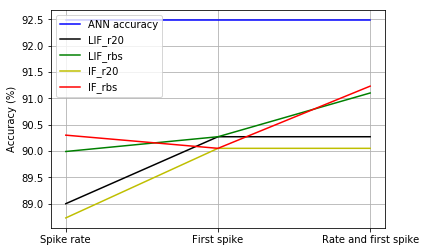

In [159]:
# Plot the SNN accuracies for SLP without input Poisson spike train at T=20ms 
# for 5 different neuron cases for 3 different output encoding

output_encode = ["Spike rate", "First spike", "Rate and first spike"]
accuracies_LIF_r20 = [89.0, 90.27, 90.27 ]
accuracies_LIF_rbs = [89.99, 90.27, 91.1]
accuracies_IF_r20 = [88.73, 90.05, 90.05]
accuracies_IF_rbs = [90.3, 90.05, 91.23]
ANN_accuracy = 92.48*np.ones((len(accuracies_LIF_r20)))
x = list(range(len(accuracies_LIF_r20)))
plt.ylabel("Accuracy (%)")
plt.plot(x, ANN_accuracy, label='ANN accuracy', color='b')
plt.plot(x, accuracies_LIF_r20, label='LIF_r20', color='k')
plt.plot(x, accuracies_LIF_rbs, label='LIF_rbs', color='g')
plt.plot(x, accuracies_IF_r20, label='IF_r20', color='y')
plt.plot(x, accuracies_IF_rbs, label='IF_rbs', color='r')
plt.xticks(x, output_encode)
plt.legend()
plt.grid()
plt.savefig('ANN2SNN_T_20.jpg')

# Observations: 
From the above experiments we can conclude that IF neurons with reset by subtraction (IF_rbs) and output encoding together with high spike rate and first spike results in better test accuracy for ANN to SNN conversion. Inorder to analyse the input encoding scheme further, let us run the experiment further for lower time scale and higher time scales. 

IF_rbs output encoding of Rate and first spike
Checking initial SNN accuracy with IF neuron with rbs; Poisson spike trains
Simulation, T:1 ms
0 out of 10000 correct
Simulation, T:2 ms
0 out of 10000 correct
Simulation, T:3 ms
5 out of 10000 correct
Simulation, T:4 ms
1721 out of 10000 correct
Simulation, T:5 ms
5284 out of 10000 correct
Simulation, T:6 ms
7457 out of 10000 correct
Simulation, T:7 ms
8244 out of 10000 correct
Simulation, T:8 ms
8601 out of 10000 correct
Simulation, T:9 ms
8784 out of 10000 correct
Simulation, T:10 ms
8901 out of 10000 correct
Simulation, T:11 ms
8910 out of 10000 correct
Simulation, T:12 ms
8980 out of 10000 correct
Simulation, T:13 ms
9026 out of 10000 correct
Simulation, T:14 ms
9030 out of 10000 correct
Simulation, T:15 ms
9056 out of 10000 correct
Simulation, T:16 ms
9085 out of 10000 correct
Simulation, T:17 ms
9099 out of 10000 correct
Simulation, T:18 ms
9091 out of 10000 correct
Simulation, T:19 ms
9118 out of 10000 correct
Simulation, T:20 ms
9

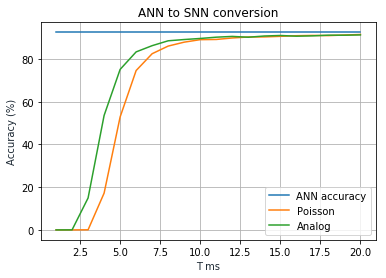

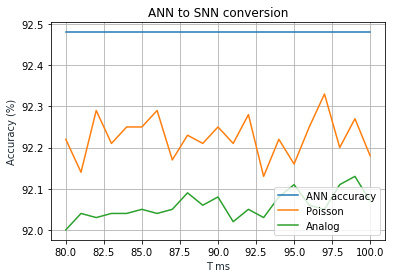

In [163]:
# For this set of experiment we are choosing neuron: IF_rbs and output encoding of Rate and first spike
# We are running 2 set of experiments one with T from 1 to 20 on both Poisson spike trains and direct input
# another experiment with T from 80 to 100 on both Poisson spike trains and direct input

np.random.seed(9001)

def SNN_prediction_IF_rbs(x, y, W1, NT):

    #np.random.seed(9001)
    inp = x.flatten()

    # create poisson spike train
    s_inp = np.random.rand(W1.shape[1], NT)
    s_inp[:, 0] = 0
    for r in range(W1.shape[1]):
        s_inp[r, 1:] = s_inp[r, 1:] < inp[r]

    I = W1.dot(s_inp)
    #I[I < 0] = 0

    V_layer = []
    spikes_layer = []
    spike_rate = []
    # n is number of neurons in a layer
    for n in range(W1.shape[0]):
        vmem, st = IF_rbs(I[n], T=NT, tau=20, threshold = 1)
        V_layer.append(vmem)
        spikes_layer.append(st)
        spike_rate.append(len(st))
        #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

    #print("Output spikes:", spikes_layer)
    #print(spike_rate)

    if any(spike_rate)!=0:
        max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
        #print("Index of max of spike rate", max_spike_rate_index)
        if len(max_spike_rate_index)>1:
            #print("Two neurons spike at same rate")
            first_spike_both = NT
            for l in range(len(max_spike_rate_index)):
                #print("First index",l, spikes_layer[max_spike_rate_index[l]])
                if min(spikes_layer[max_spike_rate_index[l]])<first_spike_both:
                    first_spike_both = min(spikes_layer[max_spike_rate_index[l]])   # min(o) = o[0]
                    prediction = max_spike_rate_index[l]
                elif min(spikes_layer[max_spike_rate_index[l]])==first_spike_both:
                    #print("Two neurons spike at same time")
                    prediction = W1.shape[0]
            #print("first spiked neuron at time with same spike rate", prediction_both, first_spike_both)
        else:
            prediction = max_spike_rate_index[0]
    else:
        prediction = W1.shape[0]

    return prediction, V_layer, spikes_layer, spike_rate

print("IF_rbs output encoding of Rate and first spike")
n_tests = x_test.shape[0]
T_start = 1
T_stop = 20
T_step = 1

# Initial SNN accuracy result with IF neuron with rbs
print("Checking initial SNN accuracy with IF neuron with rbs; Poisson spike trains")
acc_IF_rbs_poisson_both_T_20 = []
for T in range(T_start, T_stop+1, T_step):
    print("Simulation, T:{} ms".format(T))
    correct = 0
    for i in range(n_tests):
        pred, V_layer, spikes_layer, spike_rate = SNN_prediction_IF_rbs(x_test[i], y_test[i], W1, T)
        if pred == y_test[i]:
            correct += 1

    print('{} out of {} correct'.format(correct, n_tests))
    acc_IF_rbs_poisson_both_T_20.append(correct*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_IF_rbs_poisson_both_T_20)


print("IF_rbs output encoding of Rate and first spike; with direct analog input")
acc_IF_rbs_both_T_20 = []
for T in range(T_start, T_stop+1, T_step):
    correct_both = 0
    for i in range(n_tests):
        #np.random.seed(9001)
    
        inp = x_test[i].flatten()

        I = W1.dot(inp)
        #I[I < 0] = 0

        V_layer = []
        spikes_layer = []
        spike_rate = []
        # n is number of neurons in a layer
        for n in range(W1.shape[0]):
            vmem, st = IF_rbs_wo_I_of_t(I[n], T, tau=20, threshold = 1)
            V_layer.append(vmem)
            spikes_layer.append(st)
            spike_rate.append(len(st))
            #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

        #print("Output spikes:", spikes_layer)
        #print("Output spikes rate:", spike_rate)
    
        if any(spike_rate)!=0:       
            #print("Spike rate and first spike output encoding")
            max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
            #print("Index of max of spike rate", max_spike_rate_index)
            if len(max_spike_rate_index)>1:
                #print("Two neurons spike at same rate")
                first_spike_both = T
                for l in range(len(max_spike_rate_index)):
                    #print("First index",l, spikes_layer[max_spike_rate_index[l]])
                    if min(spikes_layer[max_spike_rate_index[l]])<first_spike_both:
                        first_spike_both = min(spikes_layer[max_spike_rate_index[l]])   # min(o) = o[0]
                        prediction_both = max_spike_rate_index[l]
                    elif min(spikes_layer[max_spike_rate_index[l]])==first_spike_both:
                        #print("Two neurons spike at same time")
                        prediction_both = W1.shape[0]
                #print("first spiked neuron at time with same spike rate", prediction_both, first_spike_both)
            else:
                prediction_both = max_spike_rate_index[0]
            if prediction_both == y_test[i]:
                correct_both += 1
            #print("target output & actual output", y_test[i], prediction_both)
    
        #print("prediction using both max rate and first spike", prediction_both)
    acc_IF_rbs_both_T_20.append(correct_both*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_IF_rbs_both_T_20)

# Plot the entire curves
fig = plt.figure()
x = range(T_start,T_stop+1, T_step)
y = ANN_acc*np.ones(len(x))
plt.plot(x, y, label="ANN accuracy")
y = ANN_acc*0.95*np.ones(len(x))
plt.plot(x, y, label="5% less in ANN accuracy")
y = acc_IF_rbs_poisson_both_T_20
plt.plot(x, y, label="Poisson")
y = acc_IF_rbs_both_T_20
plt.plot(x, y, label="Analog")
plt.title('ANN to SNN conversion')
plt.xlabel('T ms', color='#1C2833')
plt.ylabel('Accuracy (%)', color='#1C2833')
#plt.xscale('log')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('ANN2SNN_poisson_analog_based_prediction_T_20.jpg')

# write the accuracies to a temp file 
with open("temp_ANN2SNN_poisson_analog_based_prediction_T_20.txt", "w") as output:
    output.write("Simulation start T: {}ms and stop T: {}ms with step T: {}ms \n".format(T_start,T_stop, T_step))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with rbs and output encoding of both Rate and first spike on MNIST dataset with poisson spike generation:")
    output.write(str(acc_IF_rbs_poisson_both_T_20))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with rbs and output encoding of both Rate and first spike on MNIST dataset with direct analog input:")
    output.write(str(acc_IF_rbs_both_T_20))
    
    
    
# Experiment for Time duration from 80ms to 100ms
print("IF_rbs output encoding of Rate and first spike")
n_tests = x_test.shape[0]
T_start = 80
T_stop = 100
T_step = 1

# Initial SNN accuracy result with IF neuron with rbs
print("Checking initial SNN accuracy with IF neuron with rbs; Poisson spike trains")
acc_IF_rbs_poisson_both_T_100 = []
for T in range(T_start, T_stop+1, T_step):
    print("Simulation, T:{} ms".format(T))
    correct = 0
    for i in range(n_tests):
        pred, V_layer, spikes_layer, spike_rate = SNN_prediction_IF_rbs(x_test[i], y_test[i], W1, T)
        if pred == y_test[i]:
            correct += 1

    print('{} out of {} correct'.format(correct, n_tests))
    acc_IF_rbs_poisson_both_T_100.append(correct*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_IF_rbs_poisson_both_T_100)


print("IF_rbs output encoding of Rate and first spike; with direct analog input")
acc_IF_rbs_both_T_100 = []
for T in range(T_start, T_stop+1, T_step):
    correct_both = 0
    for i in range(n_tests):
        #np.random.seed(9001)
    
        inp = x_test[i].flatten()

        I = W1.dot(inp)
        #I[I < 0] = 0

        V_layer = []
        spikes_layer = []
        spike_rate = []
        # n is number of neurons in a layer
        for n in range(W1.shape[0]):
            vmem, st = IF_rbs_wo_I_of_t(I[n], T, tau=20, threshold = 1)
            V_layer.append(vmem)
            spikes_layer.append(st)
            spike_rate.append(len(st))
            #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

        #print("Output spikes:", spikes_layer)
        #print("Output spikes rate:", spike_rate)
    
        if any(spike_rate)!=0:       
            #print("Spike rate and first spike output encoding")
            max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
            #print("Index of max of spike rate", max_spike_rate_index)
            if len(max_spike_rate_index)>1:
                #print("Two neurons spike at same rate")
                first_spike_both = T
                for l in range(len(max_spike_rate_index)):
                    #print("First index",l, spikes_layer[max_spike_rate_index[l]])
                    if min(spikes_layer[max_spike_rate_index[l]])<first_spike_both:
                        first_spike_both = min(spikes_layer[max_spike_rate_index[l]])   # min(o) = o[0]
                        prediction_both = max_spike_rate_index[l]
                    elif min(spikes_layer[max_spike_rate_index[l]])==first_spike_both:
                        #print("Two neurons spike at same time")
                        prediction_both = W1.shape[0]
                #print("first spiked neuron at time with same spike rate", prediction_both, first_spike_both)
            else:
                prediction_both = max_spike_rate_index[0]
            if prediction_both == y_test[i]:
                correct_both += 1
            #print("target output & actual output", y_test[i], prediction_both)
    
        #print("prediction using both max rate and first spike", prediction_both)
    acc_IF_rbs_both_T_100.append(correct_both*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_IF_rbs_both_T_100)

# Plot the entire curves
fig = plt.figure()
x = range(T_start,T_stop+1, T_step)
y = ANN_acc*np.ones(len(x))
plt.plot(x, y, label="ANN accuracy")
y = acc_IF_rbs_poisson_both_T_100
plt.plot(x, y, label="Poisson")
y = acc_IF_rbs_both_T_100
plt.plot(x, y, label="Analog")
plt.title('ANN to SNN conversion')
plt.xlabel('T ms', color='#1C2833')
plt.ylabel('Accuracy (%)', color='#1C2833')
#plt.xscale('log')
plt.legend(loc='upper left')
plt.grid()
plt.savefig('ANN2SNN_poisson_analog_based_prediction_T_100.jpg')

# write the accuracies to a temp file 
with open("temp_ANN2SNN_poisson_analog_based_prediction_T_100.txt", "w") as output:
    output.write("Simulation start T: {}ms and stop T: {}ms with step T: {}ms \n".format(T_start,T_stop, T_step))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with rbs and output encoding of both Rate and first spike on MNIST dataset with poisson spike generation:")
    output.write(str(acc_IF_rbs_poisson_both_T_100))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with rbs and output encoding of both Rate and first spike on MNIST dataset with direct analog input:")
    output.write(str(acc_IF_rbs_both_T_100))


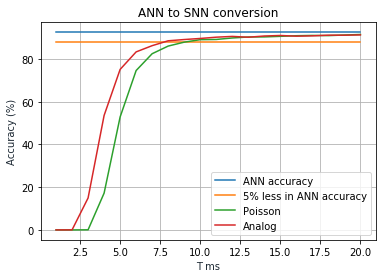

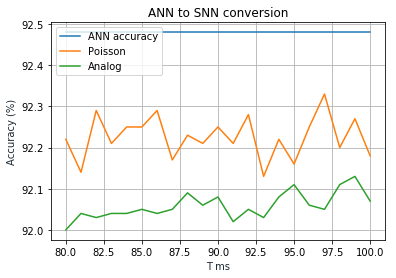

In [168]:
T_start = 1
T_stop = 20
T_step = 1
# Plot the entire curves
fig = plt.figure()
x = range(T_start,T_stop+1, T_step)
y = ANN_acc*np.ones(len(x))
plt.plot(x, y, label="ANN accuracy")
y = ANN_acc*0.95*np.ones(len(x))
plt.plot(x, y, label="5% less in ANN accuracy")
y = acc_IF_rbs_poisson_both_T_20
plt.plot(x, y, label="Poisson")
y = acc_IF_rbs_both_T_20
plt.plot(x, y, label="Analog")
plt.title('ANN to SNN conversion')
plt.xlabel('T ms', color='#1C2833')
plt.ylabel('Accuracy (%)', color='#1C2833')
#plt.xscale('log')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('ANN2SNN_poisson_analog_based_prediction_T_20.jpg')

# write the accuracies to a temp file 
with open("temp_ANN2SNN_poisson_analog_based_prediction_T_20.txt", "w") as output:
    output.write("Simulation start T: {}ms and stop T: {}ms with step T: {}ms \n".format(T_start,T_stop, T_step))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with rbs and output encoding of both Rate and first spike on MNIST dataset with poisson spike generation:")
    output.write(str(acc_IF_rbs_poisson_both_T_20))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with rbs and output encoding of both Rate and first spike on MNIST dataset with direct analog input:")
    output.write(str(acc_IF_rbs_both_T_20))

T_start = 80
T_stop = 100
T_step = 1
# Plot the entire curves
fig = plt.figure()
x = range(T_start,T_stop+1, T_step)
y = ANN_acc*np.ones(len(x))
plt.plot(x, y, label="ANN accuracy")
y = acc_IF_rbs_poisson_both_T_100
plt.plot(x, y, label="Poisson")
y = acc_IF_rbs_both_T_100
plt.plot(x, y, label="Analog")
plt.title('ANN to SNN conversion')
plt.xlabel('T ms', color='#1C2833')
plt.ylabel('Accuracy (%)', color='#1C2833')
#plt.xscale('log')
plt.legend(loc='upper left')
plt.grid()
plt.savefig('ANN2SNN_poisson_analog_based_prediction_T_100.jpg')

# write the accuracies to a temp file 
with open("temp_ANN2SNN_poisson_analog_based_prediction_T_100.txt", "w") as output:
    output.write("Simulation start T: {}ms and stop T: {}ms with step T: {}ms \n".format(T_start,T_stop, T_step))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with rbs and output encoding of both Rate and first spike on MNIST dataset with poisson spike generation:")
    output.write(str(acc_IF_rbs_poisson_both_T_100))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with rbs and output encoding of both Rate and first spike on MNIST dataset with direct analog input:")
    output.write(str(acc_IF_rbs_both_T_100))

IF_rbs output encoding of Rate and first spike
Checking initial SNN accuracy with IF neuron with rbs; Poisson spike trains
Simulation, T:1 ms
0 out of 10000 correct
Simulation, T:2 ms
0 out of 10000 correct
Simulation, T:3 ms
4 out of 10000 correct
Simulation, T:4 ms
1671 out of 10000 correct
Simulation, T:5 ms
5363 out of 10000 correct
Simulation, T:6 ms
7450 out of 10000 correct
Simulation, T:7 ms
8283 out of 10000 correct
Simulation, T:8 ms
8598 out of 10000 correct
Simulation, T:9 ms
8828 out of 10000 correct
Simulation, T:10 ms
8871 out of 10000 correct
Simulation, T:11 ms
8938 out of 10000 correct
Simulation, T:12 ms
9015 out of 10000 correct
Simulation, T:13 ms
9043 out of 10000 correct
Simulation, T:14 ms
9038 out of 10000 correct
Simulation, T:15 ms
9096 out of 10000 correct
Simulation, T:16 ms
9093 out of 10000 correct
Simulation, T:17 ms
9082 out of 10000 correct
Simulation, T:18 ms
9100 out of 10000 correct
Simulation, T:19 ms
9113 out of 10000 correct
Simulation, T:20 ms
9

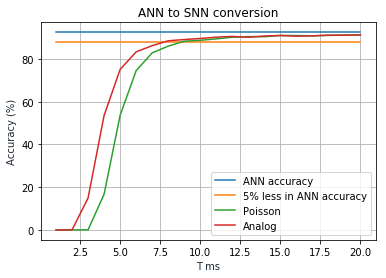

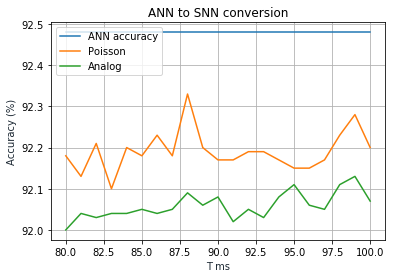

In [172]:
# For this set of experiment we are choosing neuron: IF_rbs and output encoding of Rate and first spike
# We are running 2 set of experiments one with T from 1 to 20 on both Poisson spike trains and direct input
# another experiment with T from 80 to 100 on both Poisson spike trains and direct input

se = 9020
np.random.seed(se)

def SNN_prediction_IF_rbs(x, y, W1, NT):

    np.random.seed(se)
    inp = x.flatten()

    # create poisson spike train
    s_inp = np.random.rand(W1.shape[1], NT)
    s_inp[:, 0] = 0
    for r in range(W1.shape[1]):
        s_inp[r, 1:] = s_inp[r, 1:] < inp[r]

    I = W1.dot(s_inp)
    #I[I < 0] = 0

    V_layer = []
    spikes_layer = []
    spike_rate = []
    # n is number of neurons in a layer
    for n in range(W1.shape[0]):
        vmem, st = IF_rbs(I[n], T=NT, tau=20, threshold = 1)
        V_layer.append(vmem)
        spikes_layer.append(st)
        spike_rate.append(len(st))
        #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

    #print("Output spikes:", spikes_layer)
    #print(spike_rate)

    if any(spike_rate)!=0:
        max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
        #print("Index of max of spike rate", max_spike_rate_index)
        if len(max_spike_rate_index)>1:
            #print("Two neurons spike at same rate")
            first_spike_both = NT
            for l in range(len(max_spike_rate_index)):
                #print("First index",l, spikes_layer[max_spike_rate_index[l]])
                if min(spikes_layer[max_spike_rate_index[l]])<first_spike_both:
                    first_spike_both = min(spikes_layer[max_spike_rate_index[l]])   # min(o) = o[0]
                    prediction = max_spike_rate_index[l]
                elif min(spikes_layer[max_spike_rate_index[l]])==first_spike_both:
                    #print("Two neurons spike at same time")
                    prediction = W1.shape[0]
            #print("first spiked neuron at time with same spike rate", prediction_both, first_spike_both)
        else:
            prediction = max_spike_rate_index[0]
    else:
        prediction = W1.shape[0]

    return prediction, V_layer, spikes_layer, spike_rate

print("IF_rbs output encoding of Rate and first spike")
n_tests = x_test.shape[0]
T_start = 1
T_stop = 20
T_step = 1

# Initial SNN accuracy result with IF neuron with rbs
print("Checking initial SNN accuracy with IF neuron with rbs; Poisson spike trains")
acc_IF_rbs_poisson_both_T_20 = []
for T in range(T_start, T_stop+1, T_step):
    print("Simulation, T:{} ms".format(T))
    correct = 0
    for i in range(n_tests):
        pred, V_layer, spikes_layer, spike_rate = SNN_prediction_IF_rbs(x_test[i], y_test[i], W1, T)
        if pred == y_test[i]:
            correct += 1

    print('{} out of {} correct'.format(correct, n_tests))
    acc_IF_rbs_poisson_both_T_20.append(correct*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_IF_rbs_poisson_both_T_20)


print("IF_rbs output encoding of Rate and first spike; with direct analog input")
acc_IF_rbs_both_T_20 = []
for T in range(T_start, T_stop+1, T_step):
    correct_both = 0
    for i in range(n_tests):
        np.random.seed(se)
    
        inp = x_test[i].flatten()

        I = W1.dot(inp)
        #I[I < 0] = 0

        V_layer = []
        spikes_layer = []
        spike_rate = []
        # n is number of neurons in a layer
        for n in range(W1.shape[0]):
            vmem, st = IF_rbs_wo_I_of_t(I[n], T, tau=20, threshold = 1)
            V_layer.append(vmem)
            spikes_layer.append(st)
            spike_rate.append(len(st))
            #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

        #print("Output spikes:", spikes_layer)
        #print("Output spikes rate:", spike_rate)
    
        if any(spike_rate)!=0:       
            #print("Spike rate and first spike output encoding")
            max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
            #print("Index of max of spike rate", max_spike_rate_index)
            if len(max_spike_rate_index)>1:
                #print("Two neurons spike at same rate")
                first_spike_both = T
                for l in range(len(max_spike_rate_index)):
                    #print("First index",l, spikes_layer[max_spike_rate_index[l]])
                    if min(spikes_layer[max_spike_rate_index[l]])<first_spike_both:
                        first_spike_both = min(spikes_layer[max_spike_rate_index[l]])   # min(o) = o[0]
                        prediction_both = max_spike_rate_index[l]
                    elif min(spikes_layer[max_spike_rate_index[l]])==first_spike_both:
                        #print("Two neurons spike at same time")
                        prediction_both = W1.shape[0]
                #print("first spiked neuron at time with same spike rate", prediction_both, first_spike_both)
            else:
                prediction_both = max_spike_rate_index[0]
            if prediction_both == y_test[i]:
                correct_both += 1
            #print("target output & actual output", y_test[i], prediction_both)
    
        #print("prediction using both max rate and first spike", prediction_both)
    acc_IF_rbs_both_T_20.append(correct_both*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_IF_rbs_both_T_20)

# Plot the entire curves
fig = plt.figure()
x = range(T_start,T_stop+1, T_step)
y = ANN_acc*np.ones(len(x))
plt.plot(x, y, label="ANN accuracy")
y = ANN_acc*0.95*np.ones(len(x))
plt.plot(x, y, label="5% less in ANN accuracy")
y = acc_IF_rbs_poisson_both_T_20
plt.plot(x, y, label="Poisson")
y = acc_IF_rbs_both_T_20
plt.plot(x, y, label="Analog")
plt.title('ANN to SNN conversion')
plt.xlabel('T ms', color='#1C2833')
plt.ylabel('Accuracy (%)', color='#1C2833')
#plt.xscale('log')
plt.legend(loc='lower right')
plt.grid()
plt.savefig('ANN2SNN_poisson_analog_based_prediction_T_20_{}.jpg'.format(se))

# write the accuracies to a temp file 
with open("temp_ANN2SNN_poisson_analog_based_prediction_T_20_{}.txt".format(se), "w") as output:
    output.write("Simulation start T: {}ms and stop T: {}ms with step T: {}ms \n".format(T_start,T_stop, T_step))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with rbs and output encoding of both Rate and first spike on MNIST dataset with poisson spike generation:")
    output.write(str(acc_IF_rbs_poisson_both_T_20))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with rbs and output encoding of both Rate and first spike on MNIST dataset with direct analog input:")
    output.write(str(acc_IF_rbs_both_T_20))
    
    
    
# Experiment for Time duration from 80ms to 100ms
print("IF_rbs output encoding of Rate and first spike")
n_tests = x_test.shape[0]
T_start = 80
T_stop = 100
T_step = 1

# Initial SNN accuracy result with IF neuron with rbs
print("Checking initial SNN accuracy with IF neuron with rbs; Poisson spike trains")
acc_IF_rbs_poisson_both_T_100 = []
for T in range(T_start, T_stop+1, T_step):
    print("Simulation, T:{} ms".format(T))
    correct = 0
    for i in range(n_tests):
        pred, V_layer, spikes_layer, spike_rate = SNN_prediction_IF_rbs(x_test[i], y_test[i], W1, T)
        if pred == y_test[i]:
            correct += 1

    print('{} out of {} correct'.format(correct, n_tests))
    acc_IF_rbs_poisson_both_T_100.append(correct*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_IF_rbs_poisson_both_T_100)


print("IF_rbs output encoding of Rate and first spike; with direct analog input")
acc_IF_rbs_both_T_100 = []
for T in range(T_start, T_stop+1, T_step):
    correct_both = 0
    for i in range(n_tests):
           
        inp = x_test[i].flatten()

        I = W1.dot(inp)
        #I[I < 0] = 0

        V_layer = []
        spikes_layer = []
        spike_rate = []
        # n is number of neurons in a layer
        for n in range(W1.shape[0]):
            vmem, st = IF_rbs_wo_I_of_t(I[n], T, tau=20, threshold = 1)
            V_layer.append(vmem)
            spikes_layer.append(st)
            spike_rate.append(len(st))
            #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

        #print("Output spikes:", spikes_layer)
        #print("Output spikes rate:", spike_rate)
    
        if any(spike_rate)!=0:       
            #print("Spike rate and first spike output encoding")
            max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
            #print("Index of max of spike rate", max_spike_rate_index)
            if len(max_spike_rate_index)>1:
                #print("Two neurons spike at same rate")
                first_spike_both = T
                for l in range(len(max_spike_rate_index)):
                    #print("First index",l, spikes_layer[max_spike_rate_index[l]])
                    if min(spikes_layer[max_spike_rate_index[l]])<first_spike_both:
                        first_spike_both = min(spikes_layer[max_spike_rate_index[l]])   # min(o) = o[0]
                        prediction_both = max_spike_rate_index[l]
                    elif min(spikes_layer[max_spike_rate_index[l]])==first_spike_both:
                        #print("Two neurons spike at same time")
                        prediction_both = W1.shape[0]
                #print("first spiked neuron at time with same spike rate", prediction_both, first_spike_both)
            else:
                prediction_both = max_spike_rate_index[0]
            if prediction_both == y_test[i]:
                correct_both += 1
            #print("target output & actual output", y_test[i], prediction_both)
    
        #print("prediction using both max rate and first spike", prediction_both)
    acc_IF_rbs_both_T_100.append(correct_both*100.0/n_tests)
print("List of accuracy for different simulation time, T", acc_IF_rbs_both_T_100)

# Plot the entire curves
fig = plt.figure()
x = range(T_start,T_stop+1, T_step)
y = ANN_acc*np.ones(len(x))
plt.plot(x, y, label="ANN accuracy")
y = acc_IF_rbs_poisson_both_T_100
plt.plot(x, y, label="Poisson")
y = acc_IF_rbs_both_T_100
plt.plot(x, y, label="Analog")
plt.title('ANN to SNN conversion')
plt.xlabel('T ms', color='#1C2833')
plt.ylabel('Accuracy (%)', color='#1C2833')
#plt.xscale('log')
plt.legend(loc='upper left')
plt.grid()
plt.savefig('ANN2SNN_poisson_analog_based_prediction_T_100_{}.jpg'.format(se))

# write the accuracies to a temp file 
with open("temp_ANN2SNN_poisson_analog_based_prediction_T_100_{}.txt".format(se), "w") as output:
    output.write("Simulation start T: {}ms and stop T: {}ms with step T: {}ms \n".format(T_start,T_stop, T_step))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with rbs and output encoding of both Rate and first spike on MNIST dataset with poisson spike generation:")
    output.write(str(acc_IF_rbs_poisson_both_T_100))
    output.write("\n Accuracy for ANN-SNN conversion for a single layer network with IF neuron with rbs and output encoding of both Rate and first spike on MNIST dataset with direct analog input:")
    output.write(str(acc_IF_rbs_both_T_100))


In [130]:
# Initializing seed 
np.random.seed(9001)

# Initial SNN accuracy result with IF neuron with rbs without poisson spike trains but with actual input 
print("Checking initial SNN accuracy with IF neuron with rbs with actual input")
n_tests = x_test.shape[0]
correct = 0
correct_spike_rate = 0
correct_first_spike = 0
correct_both = 0
cor = 0
for i in range(n_tests):
    #pred, V_layer, spikes_layer, spike_rate = SNN_prediction_IF_rbs_wo_poisson(x_test[i],y_test[i],W1,NT=20)
    
    np.random.seed(9001)
    
    #N = W1.shape[1]
    inp = x_test[i].flatten()
    #s_inp = spikes(x, y, NT, N)

    I = W1.dot(inp)
    #I[I < 0] = 0

    V_layer = []
    spikes_layer = []
    spike_rate = []
    T = 20
    # n is number of neurons in a layer
    for n in range(W1.shape[0]):
        vmem, st = IF_rbs_wo_I_of_t(I[n], T=20, tau=20, threshold = 1)
        V_layer.append(vmem)
        spikes_layer.append(st)
        spike_rate.append(len(st))
        #print('Neuron spikes {} times at the following simulation time steps:{}'.format(len(st), st))

    #print("Output spikes:", spikes_layer)
    #print("Output spikes rate:", spike_rate)
    
    if any(spike_rate)!=0:
        #print("Spike rate output encoding")
        max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
        #print("Index of max of spike rate", max_spike_rate_index)
        if len(max_spike_rate_index)>1:
            #print("Two neurons spike at same rate")
            prediction_spike_rate = W1.shape[0]
        else:
            prediction_spike_rate = np.argmax(spike_rate)
        #print("prediction using spike rate", prediction_spike_rate)
        if prediction_spike_rate == y_test[i]:
            correct_spike_rate += 1
            #print("target output & actual output", y_test[i], prediction_spike_rate)
    
    
        #print("First spike output encoding")
        #prediction_first_spike = [i for i, o in enumerate(spikes_layer) for u, v in enumerate(o) if v == min(o)]
        first_spike = T
        for p, o in enumerate(spikes_layer):
            if o != []:
                #print(p, o)
                if min(o)<first_spike:
                    first_spike = min(o)   # min(o) = o[0]
                    prediction_first_spike = p
                elif min(o)==first_spike:
                    #print("Two neurons spike at same time")
                    prediction_first_spike = W1.shape[0]
        #print("first spiked neuron at time", prediction_first_spike, first_spike)
        #print("prediction using first spike", prediction_first_spike)
        if prediction_first_spike == y_test[i]:
            correct_first_spike += 1
            #print("target output & actual output", y_test[i], prediction_first_spike)
        

        #print("Spike rate and first spike output encoding")
        max_spike_rate_index = [index for index,value in enumerate(spike_rate) if value==max(spike_rate)]
        #print("Index of max of spike rate", max_spike_rate_index)
        if len(max_spike_rate_index)>1:
            #print("Two neurons spike at same rate")
            first_spike_both = T
            for l in range(len(max_spike_rate_index)):
                #print("First index",l, spikes_layer[max_spike_rate_index[l]])
                if min(spikes_layer[max_spike_rate_index[l]])<first_spike_both:
                    first_spike_both = min(spikes_layer[max_spike_rate_index[l]])   # min(o) = o[0]
                    prediction_both = max_spike_rate_index[l]
                elif min(spikes_layer[max_spike_rate_index[l]])==first_spike_both:
                    #print("Two neurons spike at same time")
                    prediction_both = W1.shape[0]
            #print("first spiked neuron at time with same spike rate", prediction_both, first_spike_both)
        else:
            prediction_both = max_spike_rate_index[0]
        if prediction_both == y_test[i]:
            correct_both += 1
        #print("target output & actual output", y_test[i], prediction_both)
    
    #print("prediction using both max rate and first spike", prediction_both)
    
    """
    first_spike = [ind for ind,val in enumerate(spikes_layer[max_spike_rate_index][0]) if val==min(spikes_layer[max_spike_rate_index][0])]
    print("first spike", first_spike)
    prediction_both = max_spike_rate_index[first_spike]
    
    
    spike_rate_remaining = spike_rate
    srp = spike_rate[prediction]
    spike_rate_remaining.remove(srp)
    if srp in spike_rate_remaining:
            cor += 1
            print("Spike rate repeated in sample", i)
            print("target output & actual output", y_test[i], prediction)
            print(spike_rate)
            print("Output spikes:", spikes_layer)
        
    #print("######################################################################")
    #print("#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@#")
    #print("######################################################################")
        
        #print(spike_rate)
        spike_rate_remaining = spike_rate
        srp = spike_rate[prediction]
        #print("Spike rate of prediction", spike_rate[prediction], srp)
        spike_rate_remaining.remove(srp)
        if srp in spike_rate_remaining:
            cor += 1
            print("Spike rate repeated in sample", i)
            print("target output & actual output", y_test[i], prediction)
            print(spike_rate)
            print("Output spikes:", spikes_layer)
    """

print("Accuracy:", correct_spike_rate*100.0/n_tests)
print("Accuracy:", correct_first_spike*100.0/n_tests)
print("Accuracy:", correct_both*100.0/n_tests)

#print('{} out of {} correct'.format(correct, n_tests))
#print("Accuracy:", correct*100.0/n_tests)
#print("Samples with same rate", cor)

Checking initial SNN accuracy with IF neuron with rbs with actual input
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output 

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Two neurons spike at same time
Spike rate and first spike outpu

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output en

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output en

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
Two neurons spike at same rate
First spike output encoding
Spike rate and first spike output encoding
Two neurons spike at same rate
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
S

Spike rate output encoding
First spike output encoding
Two neurons spike at same time
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Two neurons spike at same time
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
S

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Two neurons spike at same time
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike outpu

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output en

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output en

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
Two neurons spike at same rate
First spike output encoding
Two neurons spike at same time
Spike rate and first spike output encoding
Two neurons spike at same rate
Two neurons spike at same time
Spike rate output encoding
Two neurons spike at same rate
First spike output encoding
Two neurons spike at same time
Spike rate and first spike output encoding
Two neurons spike at same rate

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output en

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Two neurons spike at same time
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike outpu

Spike rate output encoding
Two neurons spike at same rate
First spike output encoding
Spike rate and first spike output encoding
Two neurons spike at same rate
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
S

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Two neurons spike at same time
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike outpu

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
Two neurons spike at same rate
First spike output encoding
Spike rate and first spike output encoding
Two neurons spike at same rate
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
S

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
Two neurons spike at same rate
First spike output encoding
Spike rate and first spike output encoding
Two neurons spike at same rate
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
S

Spike rate output encoding
Two neurons spike at same rate
First spike output encoding
Spike rate and first spike output encoding
Two neurons spike at same rate
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
S

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
Two neurons spike at same rate
First spike output encoding
Two neurons spike at same time
Spike rate and first spike output encoding
Two neurons spike at same rate
Two neurons spike at same time
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output enc

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Two neurons spike at same time
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike outpu

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
Two neurons spike at same rate
First spike output encoding
Two neurons spike at same time
Spike rate and first spike output encoding
Two neurons spike at same rate
Two neurons spike at same time
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
Two neurons spike at same rate
First spike output encoding
Spike rate and first spike output encoding
Two neurons spike at same rate
Spike rate output encoding
First spike output encoding
Two neurons spike at same time
Spike rate and first spike output encoding

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Two neurons spike at same time
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Two neurons spike at same time
S

First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
Two neurons spike at same rate
First spike output encoding
Two neurons spike at same time
Spike rate and first spike output encoding
Two neurons spike at same rate
Two neurons spike at same time
Spike rate output enc

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output en

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output en

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output en

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Two neurons spike at same time
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike outpu

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Two neurons spike at same time
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike outpu

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Two neurons spike at same time
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike outpu

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
Two neurons spike at same rate
First spike output encoding
Spike rate and first spike output encoding
Two neurons spike at same rate
Spike rate output encoding
Two neurons spike at same rate
First spike output encoding
Two neurons spike at same time
Spike rate and first spike output encoding
Two neurons spike at same rate
Two neurons spike at same time
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
Two neurons spike at same rate
First spike output encoding
Spike rate and first spike output encoding
Two neurons spike at same rate
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate 

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output en

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
Two neurons spike at same rate
First spike output encoding
Spike rate and first spike output encoding
Two neurons spike at same rate
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
S

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output en

First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output e

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output en

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output en

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output en

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output en

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output en

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output en

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output en

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output en

Spike rate output encoding
First spike output encoding
Two neurons spike at same time
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike outpu

Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output encoding
First spike output encoding
Spike rate and first spike output encoding
Spike rate output en